<a href="https://colab.research.google.com/github/BretaOsodo/credit-card-fraud-detection/blob/main/Behavioral_Credi_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Introduction

Credit card fraud has become one of the most persistent challenges in the financial sector, driven by rapid digitalization, cross-border transactions, and evolving customer behavior. Traditional fraud detection systems often rely on rigid rule-based mechanisms or static machine learning models trained on historical data. While effective in detecting known fraud patterns, these approaches struggle to adapt to the dynamic nature of modern consumer behavior, leading to a high rate of false positives thus legitimate transactions incorrectly flagged as fraudulent.

The Behavioral Credit Card Detection Project seeks to overcome this limitation by leveraging behavioral analytics and machine learning to build a more adaptive, context-aware fraud detection system. The central idea is to understand and model customer transaction behavior by how, when, and where individuals typically spend  and use these patterns to distinguish genuine activities from fraudulent anomalies.

This project begins by applying unsupervised learning (clustering) techniques to segment customers based on their transaction behaviors. These behavioral clusters help reveal natural spending patterns, high-risk segments, and potential anomalies. The insights gained from clustering then inform the development of a supervised predictive model that combines traditional transaction features with behavioral insights to improve detection accuracy and reduce false alerts.

Ultimately, this project aims to deliver a fraud detection framework that not only strengthens financial security but also enhances the customer experience by minimizing unnecessary transaction declines and improving trust in digital banking systems.

#2.Data Preprocessing

##2.1 Importing The data

In [1]:
#importing the module
import pandas as pd
import glob

In [2]:
#creating the path for out data
path_identity='/content/drive/MyDrive/Datasets/Fraud detection/train_identity.csv'
path_transactions='/content/drive/MyDrive/Datasets/Fraud detection/train_transaction.csv'

file_path1=glob.glob(path_identity)
file_path2=glob.glob(path_transactions)

all_files=file_path1 + file_path2

In [3]:
#concat the files
df= pd.concat((pd.read_csv(file) for file in all_files), ignore_index=True)
df.shape

(734773, 434)

In [4]:
#lets view the first 5 rows
df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##2.2 Data Cleaning

###2.2.1 Remove Duplicates and Missing Values

In [5]:
#lets inspect our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734773 entries, 0 to 734772
Columns: 434 entries, TransactionID to V339
dtypes: float64(402), int64(1), object(31)
memory usage: 2.4+ GB


In [6]:
#lets the determine the columns that are categorical
cat_cols=list(df.select_dtypes('object'))
cat_cols

['id_12',
 'id_15',
 'id_16',
 'id_23',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [7]:
#lets see the columns under the numerical cols
num_cols=list(df.select_dtypes('number'))
num_cols

['TransactionID',
 'id_01',
 'id_02',
 'id_03',
 'id_04',
 'id_05',
 'id_06',
 'id_07',
 'id_08',
 'id_09',
 'id_10',
 'id_11',
 'id_13',
 'id_14',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_24',
 'id_25',
 'id_26',
 'id_32',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 '

In [8]:
#remove all columns that have 50% of their data NaN
missing_percent=df.isnull().mean()*100

missing_percent_50=missing_percent[missing_percent > 50]

print('Columns woth more than 50% of missing values:\n')
print(len(missing_percent_50))

Columns woth more than 50% of missing values:

232


Our data has 232 columns whose missing data is above 50%

In [9]:
#lets view ths columns that have more than 50% of their data missing value
for cols in missing_percent_50.index:
  print(cols)

id_01
id_02
id_03
id_04
id_05
id_06
id_07
id_08
id_09
id_10
id_11
id_12
id_13
id_14
id_15
id_16
id_17
id_18
id_19
id_20
id_21
id_22
id_23
id_24
id_25
id_26
id_27
id_28
id_29
id_30
id_31
id_32
id_33
id_34
id_35
id_36
id_37
id_38
DeviceType
DeviceInfo
dist1
dist2
R_emaildomain
D2
D3
D5
D6
D7
D8
D9
D11
D12
D13
D14
M1
M2
M3
M4
M5
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167
V168
V169
V170
V171
V172
V173
V174
V175
V176
V177
V178
V179
V180
V181
V182
V183
V184
V185
V186
V187
V188
V189
V190
V191
V192
V193
V194
V195
V196
V197
V198
V199
V200
V201
V202
V203
V204
V205
V206
V207
V208
V209
V210
V211
V212
V213
V214
V215
V216
V217
V218
V219
V220
V221
V222
V223
V224
V225
V226
V227
V228
V229
V230
V231
V232
V233
V234
V235
V236
V237
V238
V239
V240
V241
V242
V243
V244
V245
V246
V247
V248
V249
V250
V251
V252
V253
V254
V255
V256
V257
V258
V259
V260
V261
V262
V26

In [10]:
df= df.drop(columns=missing_percent_50.index)

In [11]:
df.shape

(734773, 202)

We have successfully dropped all the columns that have more than 50% of their data mising values.

In [12]:
#lets determine if we have duplicates in our data
df.duplicated().any()

np.False_

It has retruned False that means our data doesn't have any duplicates

In [13]:
#lets see the new categorical columns after dropping other columns
num_cols_new=list(df.select_dtypes('number'))
num_cols_new

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D4',
 'D10',
 'D15',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',


In [14]:
#drop transaction ID
df.drop(columns='TransactionID',inplace =True)

In [15]:
#drop TransactionDt
df.drop(columns='TransactionDT',inplace=True)

In [16]:
#lets view the categorical column after dropping other columns
cat_cols_new=list(df.select_dtypes('object'))
cat_cols_new

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M6']

In [17]:
df.ProductCD.unique()

array([nan, 'W', 'H', 'C', 'S', 'R'], dtype=object)

In [18]:
#determining the type of card by company
df.card4.unique()

array([nan, 'discover', 'mastercard', 'visa', 'american express'],
      dtype=object)

In [19]:
#determining the type of credit card
df.card6.unique()

array([nan, 'credit', 'debit', 'debit or credit', 'charge card'],
      dtype=object)

In [20]:
df.P_emaildomain.unique(
)

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

###2.2.2 High and Low Cardinality

Cardinality is the number of unique features a categorical column has. High cardinality may cause overfitting when e train our data

In [21]:
#lets identify the number of unique features in categorical columns
df.select_dtypes('object').nunique().sort_values(ascending=False)

,0
P_emaildomain,59
ProductCD,5
card4,4
card6,4
M6,2


P_emaildomain has high cardinality which may cause overfitting and may be hard to encode during feature engineering.The best option is to drop the column

In [22]:
df.drop(columns='P_emaildomain',inplace =True)

###2.2.3 Outliers

In [23]:
#lets get the statistical description of our numerical features
df.select_dtypes('number').describe().drop(columns='isFraud')

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,590540.000000,590540.000000,590540.000000,...,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000
mean,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,14.092458,15.269734,0.005644,...,39.173910,21.351473,43.319174,26.806977,109.818544,247.606741,162.153398,18.372476,42.073133,28.326584
std,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,133.569018,154.668899,0.150536,...,172.128339,95.902970,173.619028,116.853222,2270.033202,3980.042828,2793.343636,332.304848,473.499307,382.053171
min,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,3.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,4685.000000,5691.000000,26.000000,...,55125.000000,4817.470215,7519.870117,4817.470215,93736.000000,134021.000000,98476.000000,104060.000000,104060.000000,104060.000000


In [24]:
#lets dtermine the columns which have skewed data
numerical_cols=df.select_dtypes('number')
describe = numerical_cols.describe().T
describe['median']=numerical_cols.median()

#lets calculate the absolute difference between mean and median
describe['mean_median_diff']=abs(describe['mean']-describe['median'])
describe['skew'] = numerical_cols.skew()

#lets determine the threshold which considers big difference
threshold=describe['mean_median_diff'].mean() + describe['mean_median_diff'].std()

#lets filter the column
skewed_cols=describe[describe['mean_median_diff']> threshold]

#print the skewed columns
print(skewed_cols[['mean','median','skew','mean_median_diff']])

              mean  median       skew  mean_median_diff
card1  9898.734658  9678.0  -0.040929        220.734658
D1       94.347568     3.0   1.805381         91.347568
D4      140.002441    26.0   1.171331        114.002441
D10     123.982137    15.0   1.391510        108.982137
D15     163.744579    52.0   0.957355        111.744579
V126    129.979417     0.0  29.581656        129.979417
V127    336.611559     0.0  25.683868        336.611559
V128    204.094038     0.0  25.051846        204.094038
V130     92.165849     0.0  26.295628         92.165849
V132    103.513188     0.0  30.231449        103.513188
V133    204.889160     0.0  26.864235        204.889160
V134    145.972328     0.0  25.988067        145.972328
V306    139.748713     0.0  29.272873        139.748713
V307    408.682375     0.0  23.667914        408.682375
V308    230.413180     0.0  24.530050        230.413180
V310    118.195658     0.0  19.497761        118.195658
V316    109.818544     0.0  30.097389        109

We have skewed data in 19 columns. Lets visualize each colum with histogram and visualize outliers using seaborn boxplot

In [25]:
#lets import the modules that we are going to use for visualization
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns

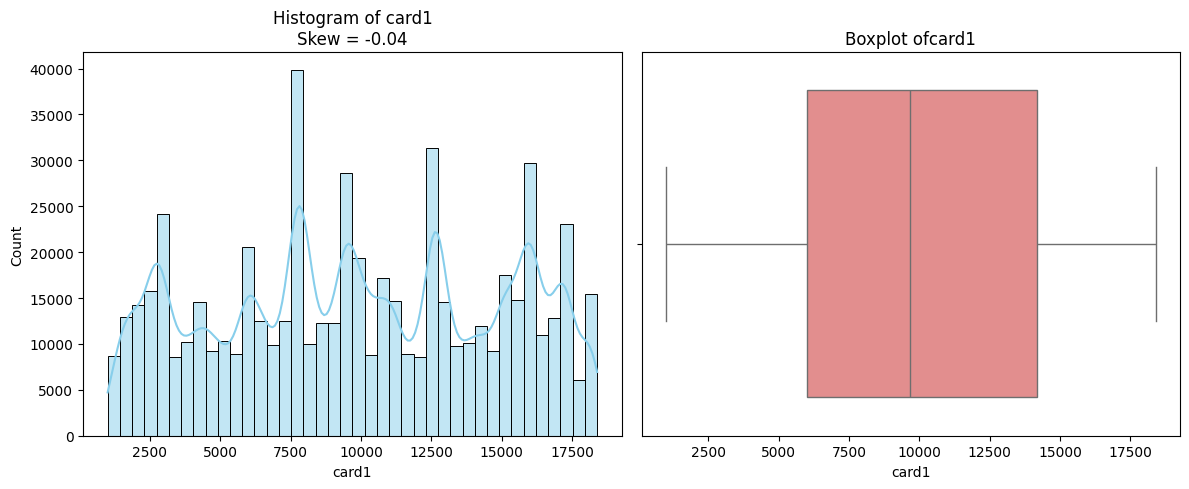

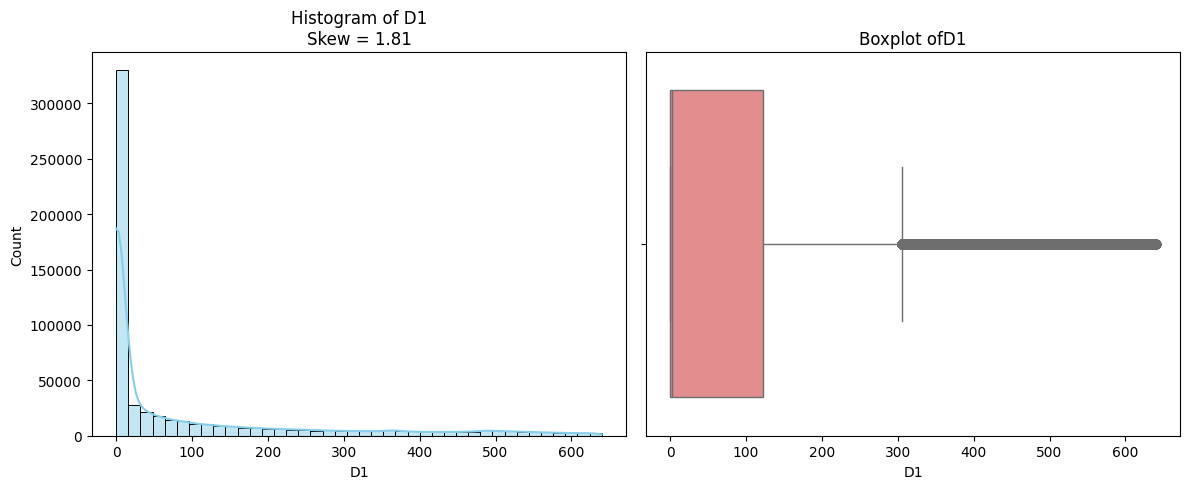

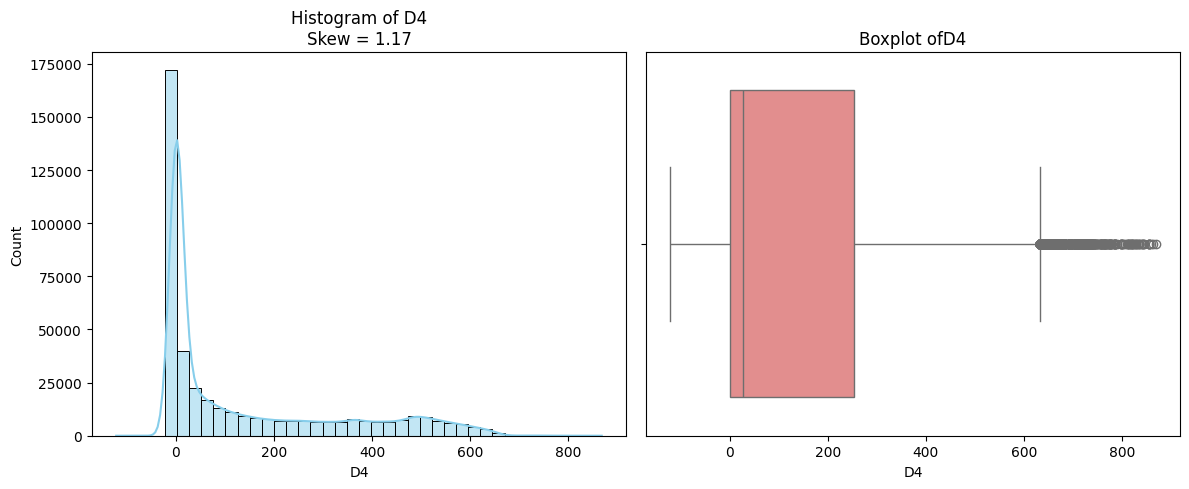

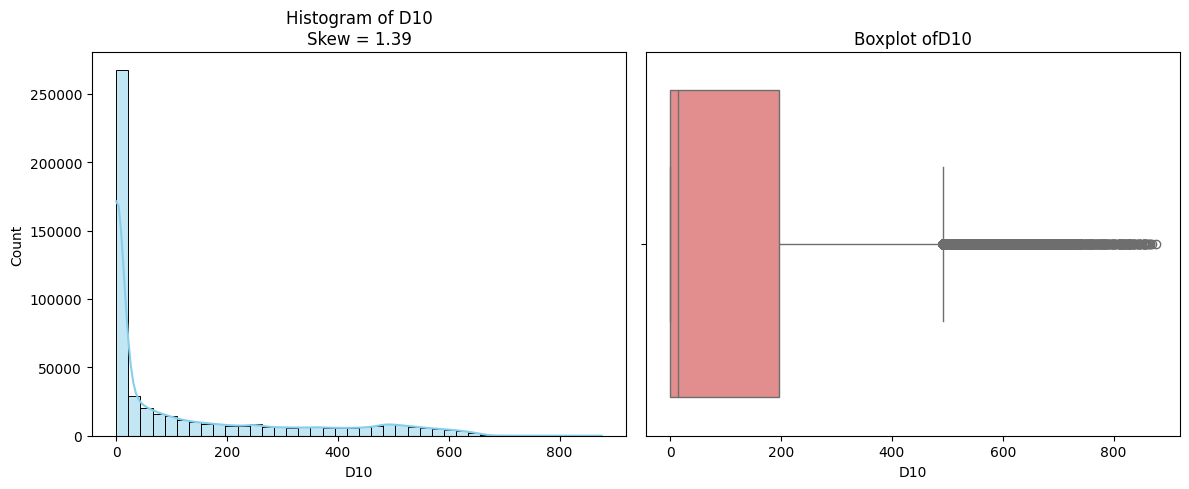

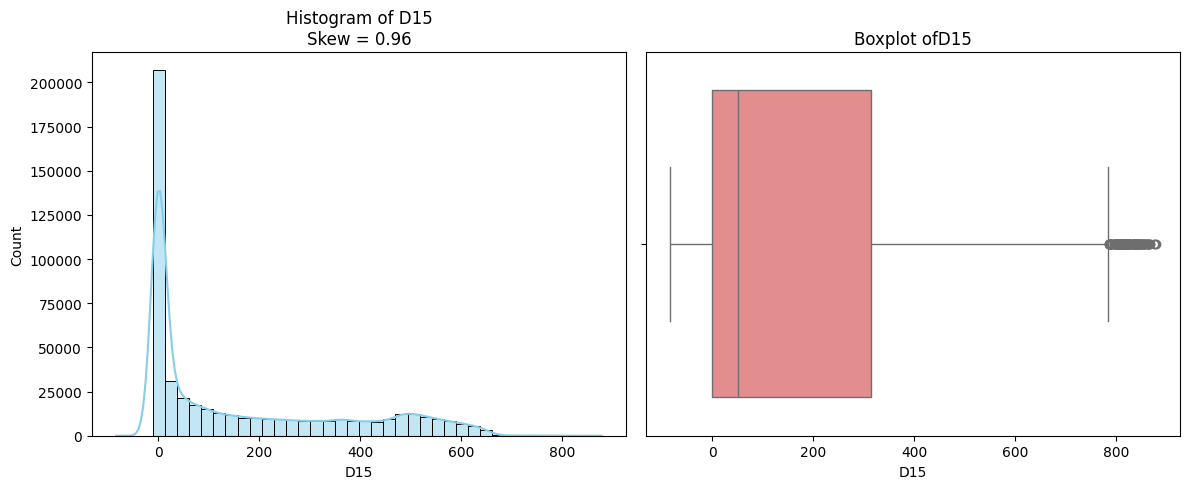

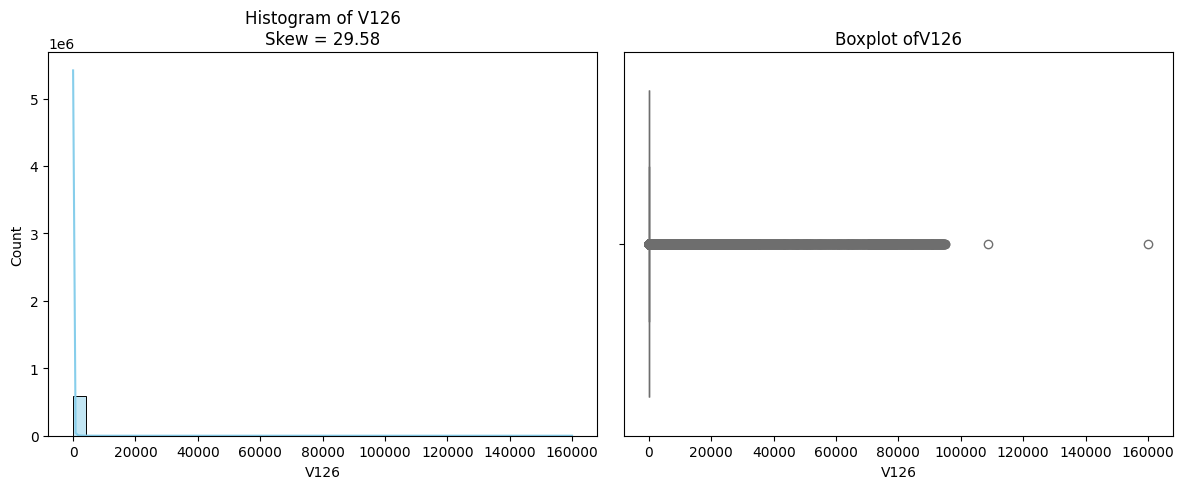

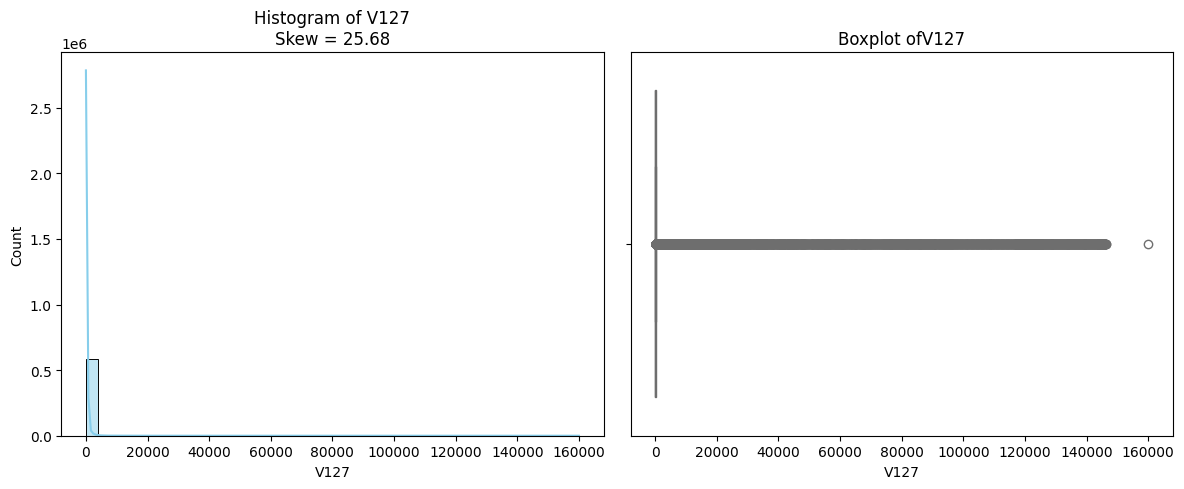

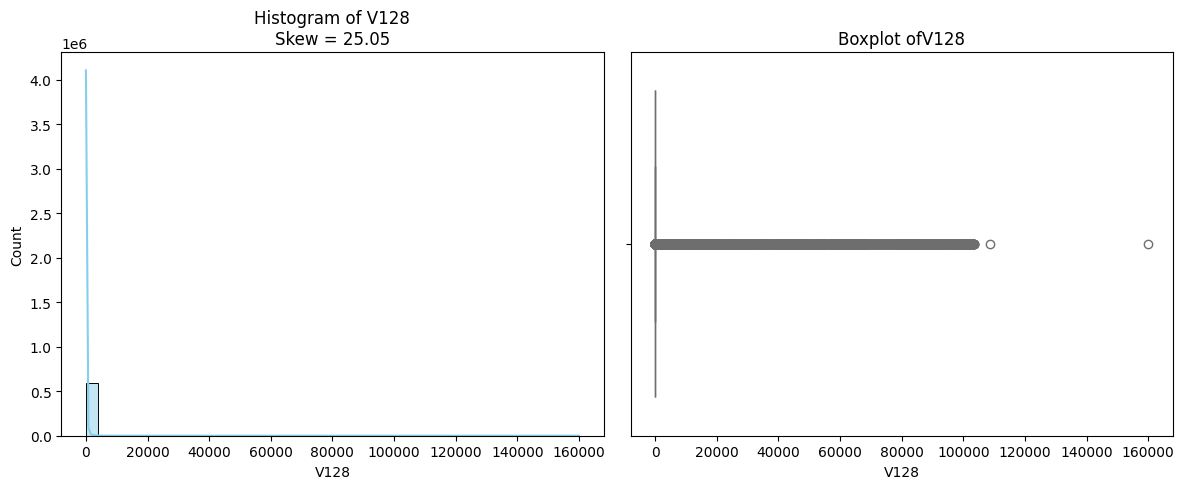

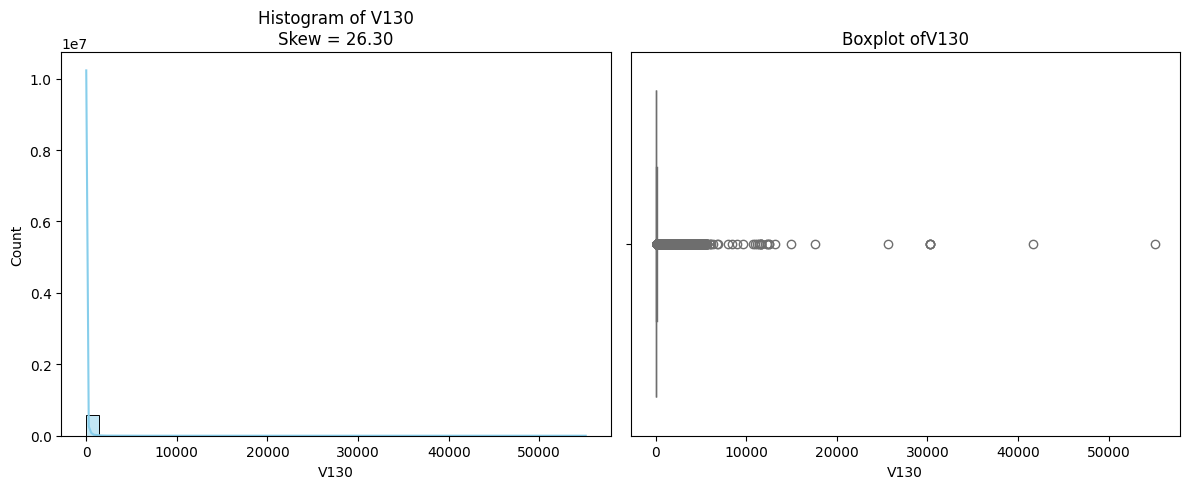

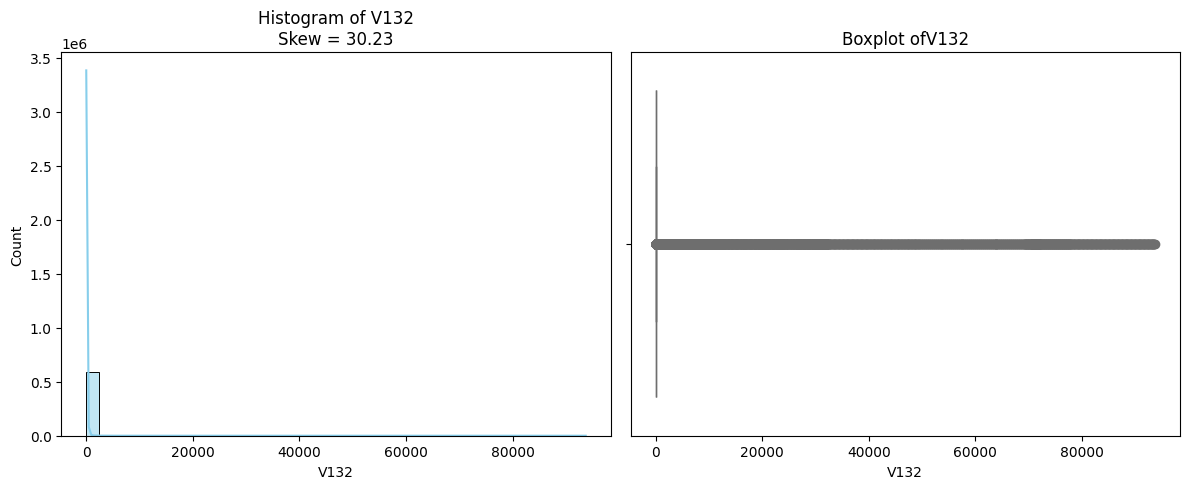

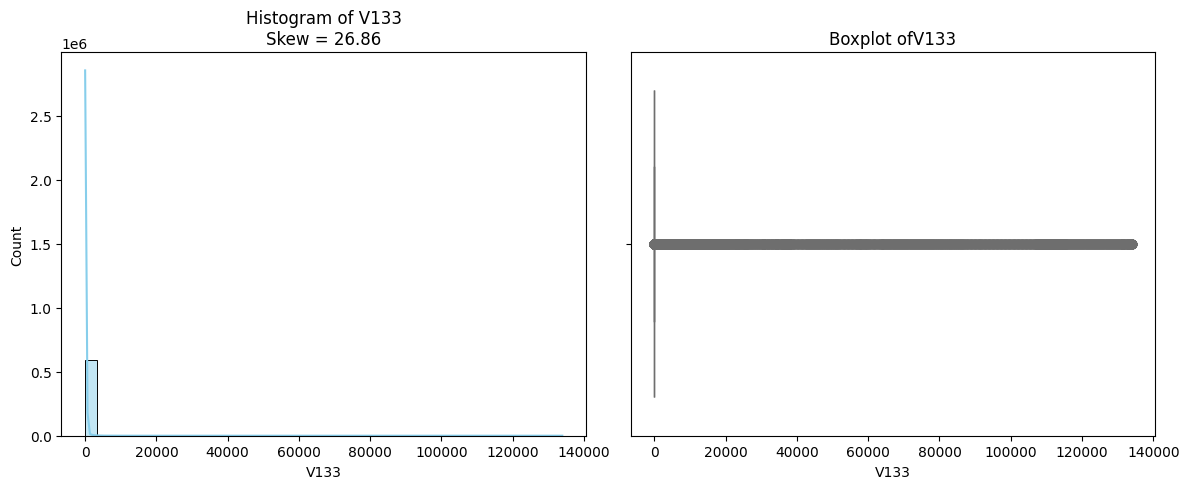

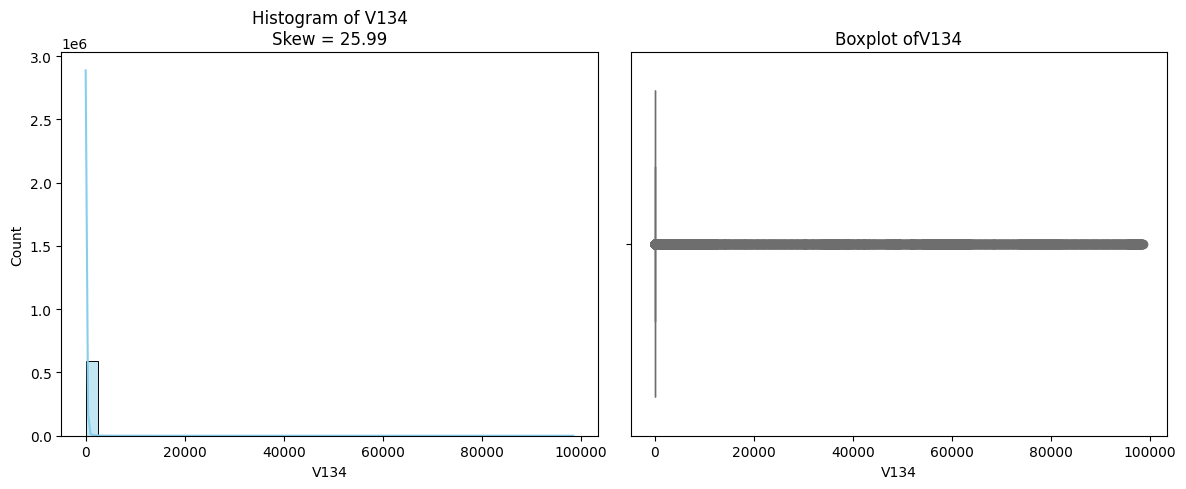

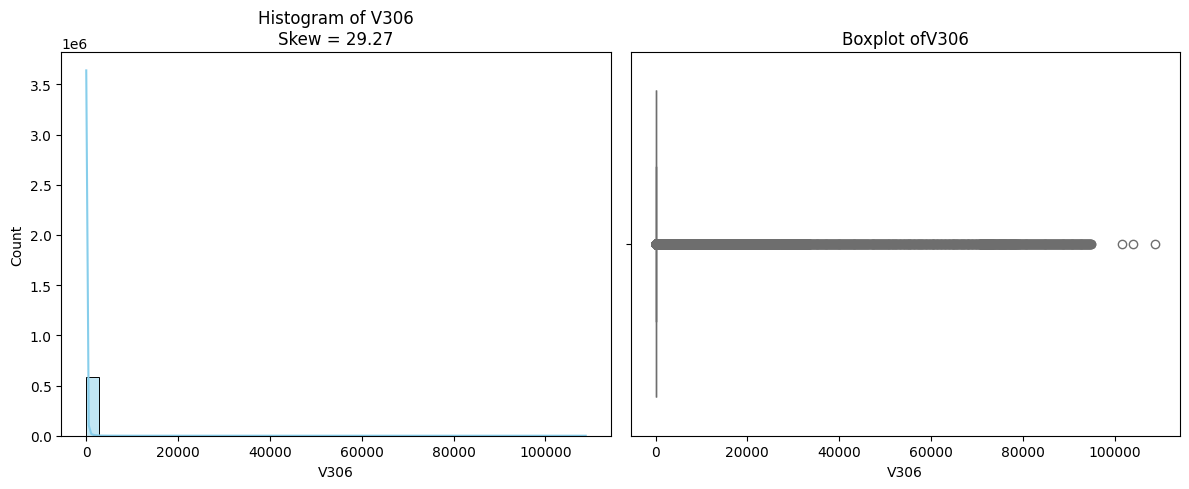

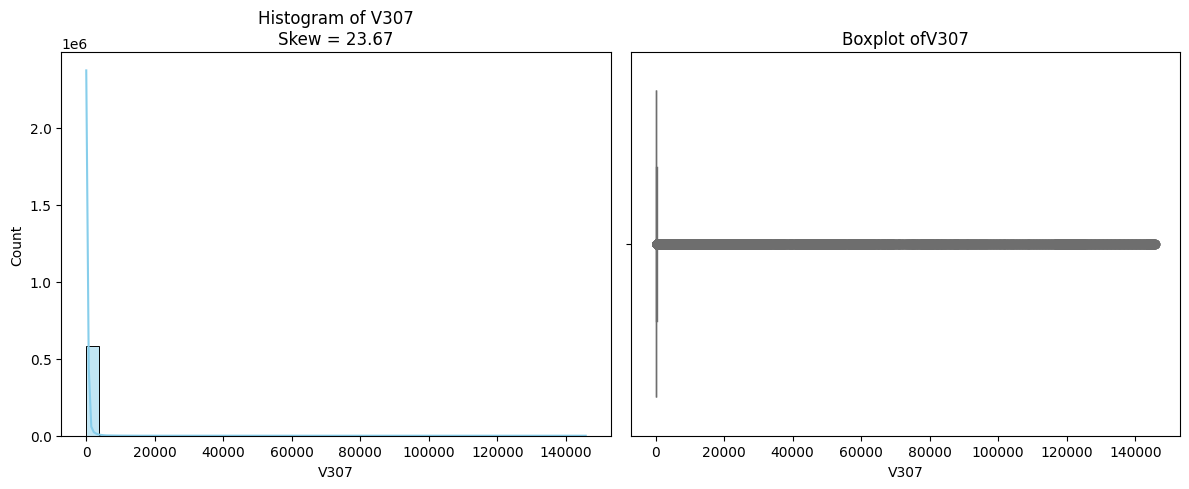

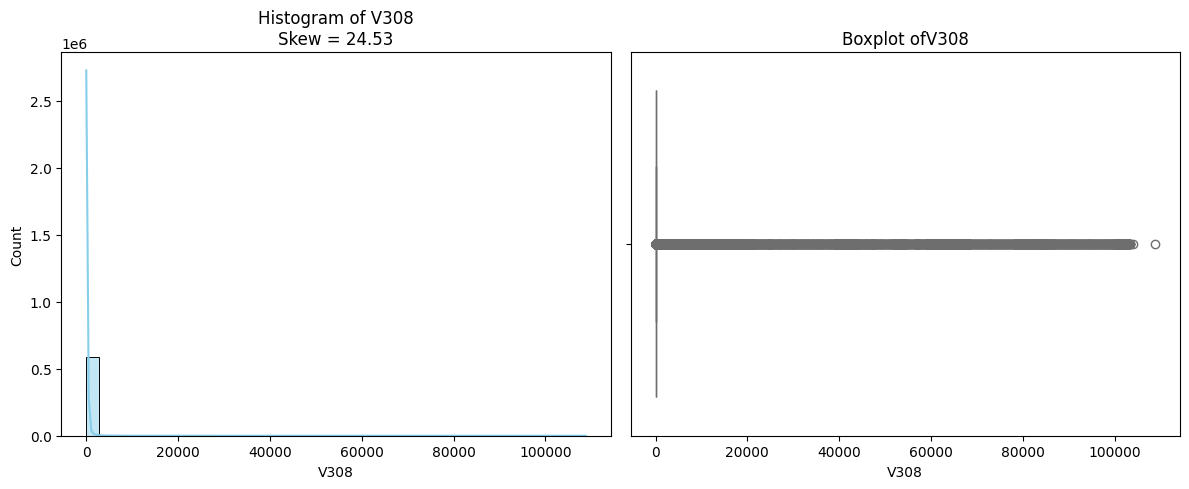

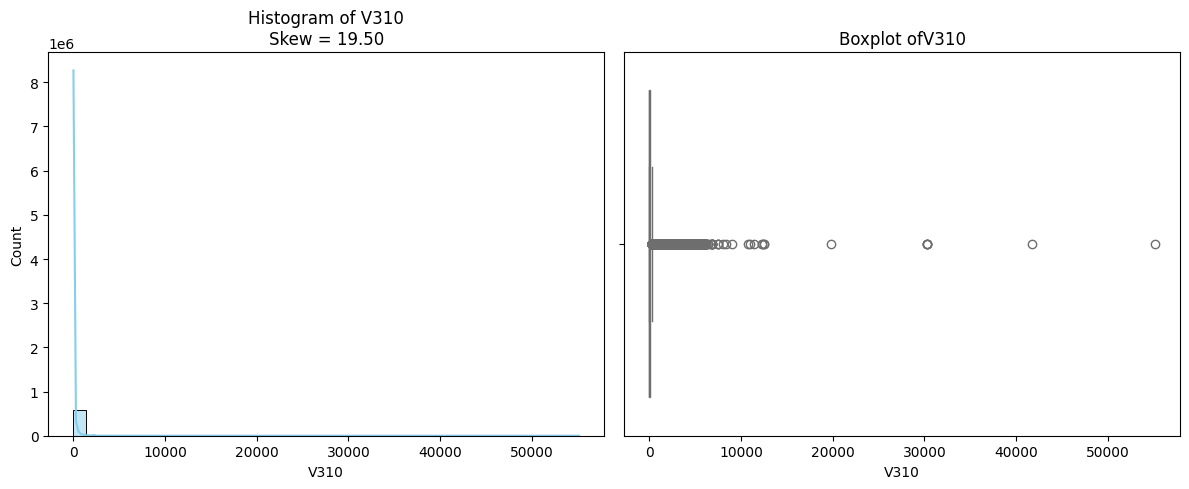

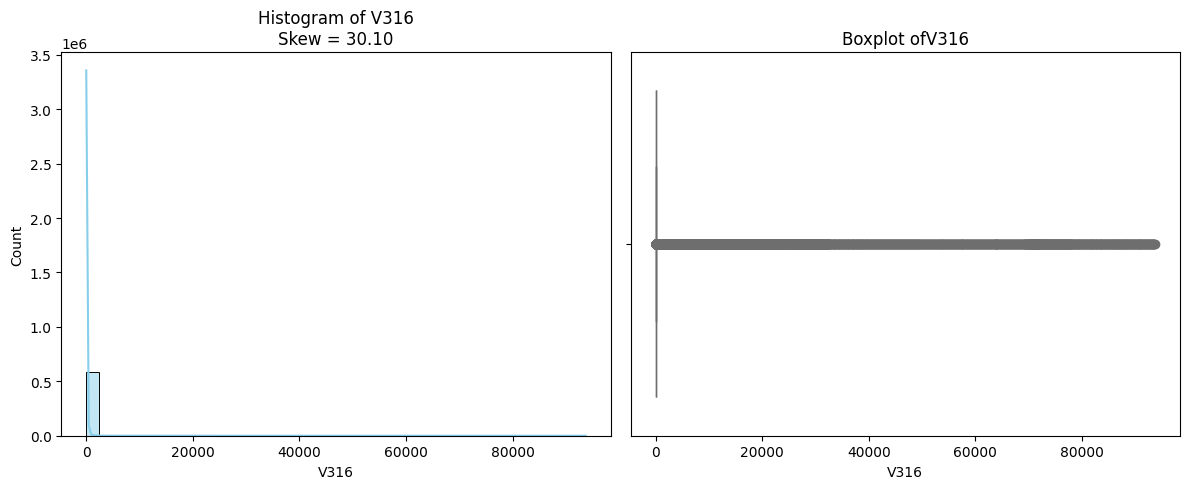

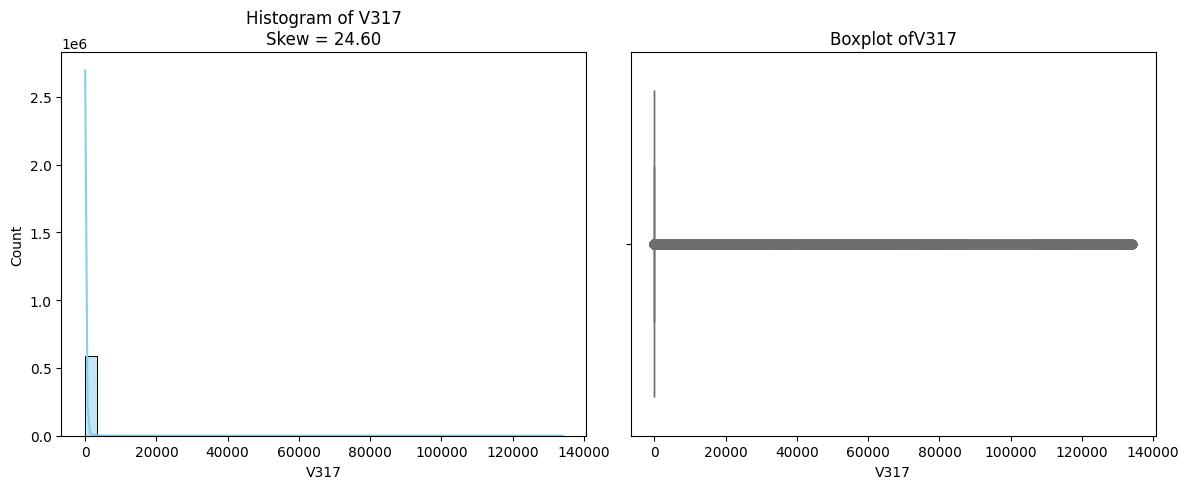

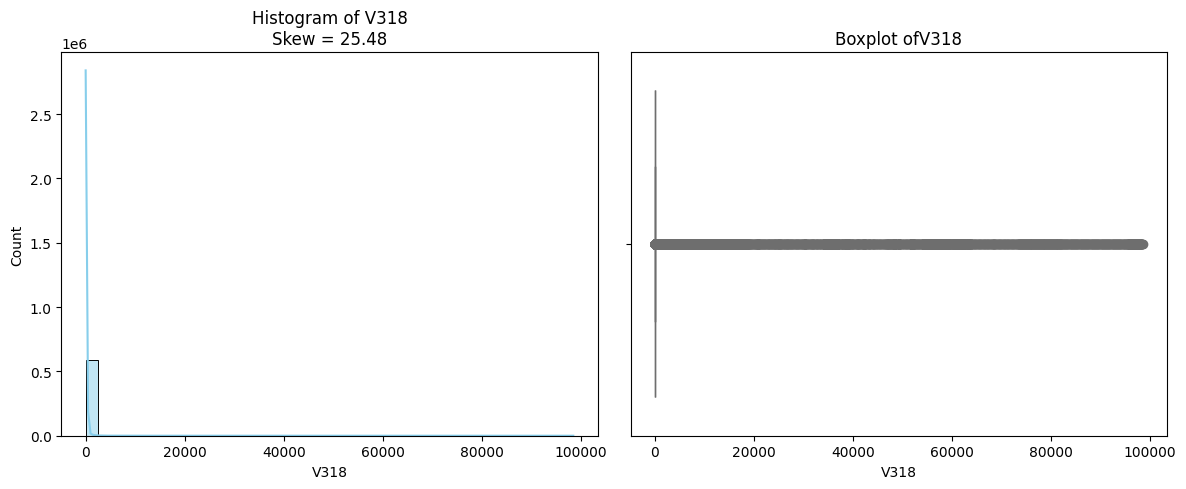

In [26]:
#lets visualize each skewed columns
for col in skewed_cols.index:
  #lets plot an histogram
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.histplot(df[col],bins=40,kde=True,color='skyblue')
  plt.title(f"Histogram of {col}\nSkew = {describe.loc[col, 'skew']:.2f}")
  plt.xlabel(col)

  #Boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=df[col],color='lightcoral')
  plt.title(f'Boxplot of{col}')
  plt.xlabel(col)
  plt.tight_layout()
  plt.show()

In [27]:
#lets remove outliers for our skewed columns using Quantile
import pandas as pd

# Copy dataframe to preserve original
df_clean = df.copy()

# Loop through skewed columns
for col in skewed_cols.index:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("Shape before outlier removal:", df.shape)
print("Shape after outlier removal:", df_clean.shape)


Shape before outlier removal: (734773, 199)
Shape after outlier removal: (140554, 199)


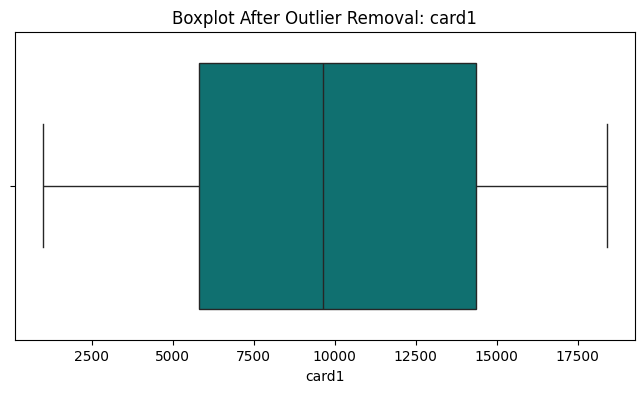

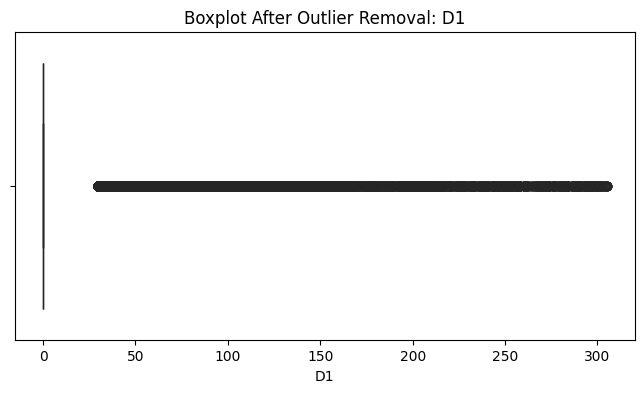

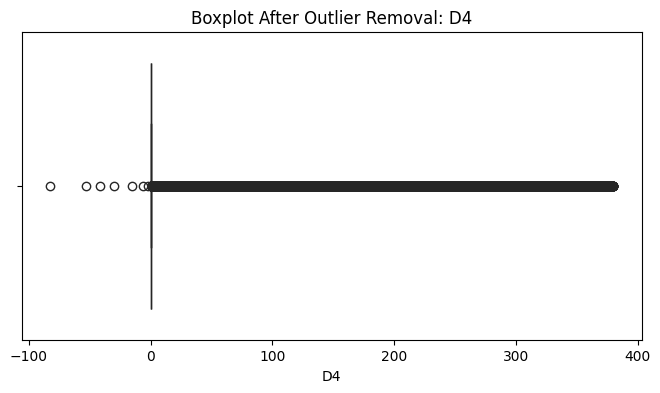

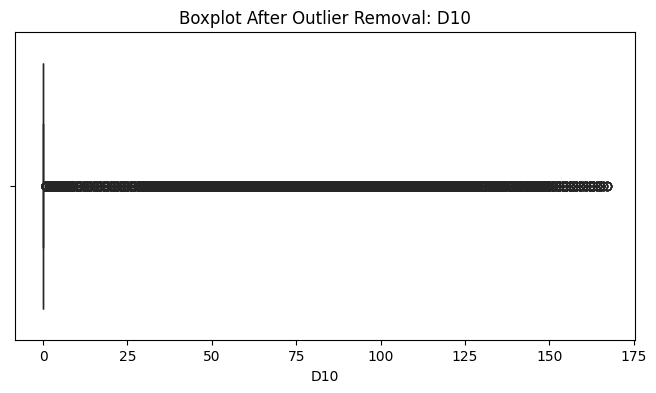

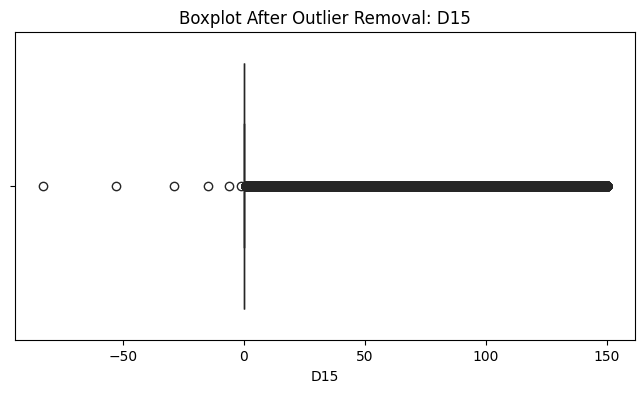

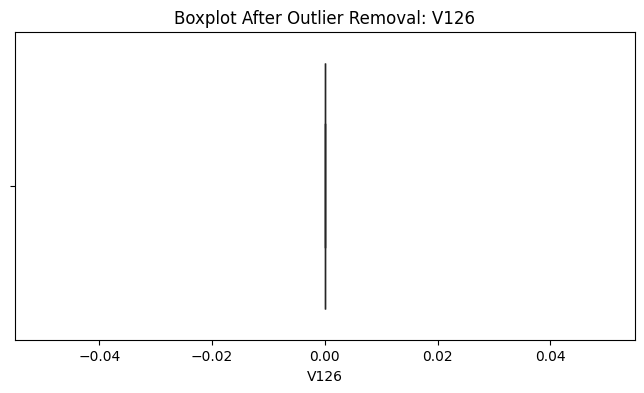

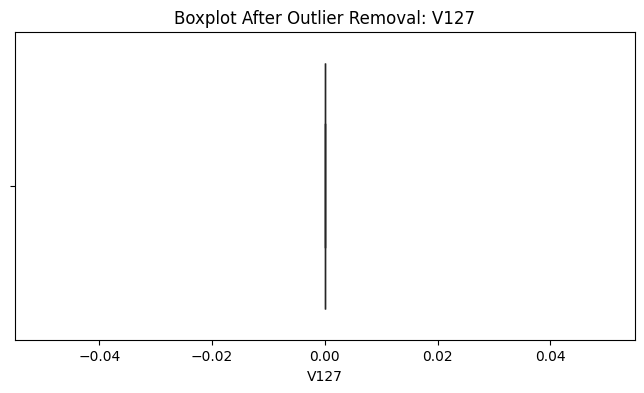

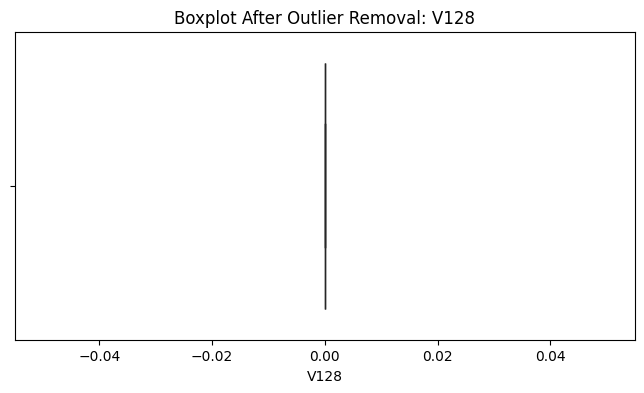

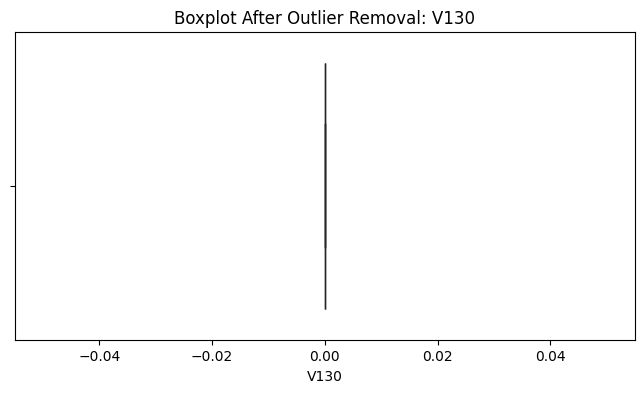

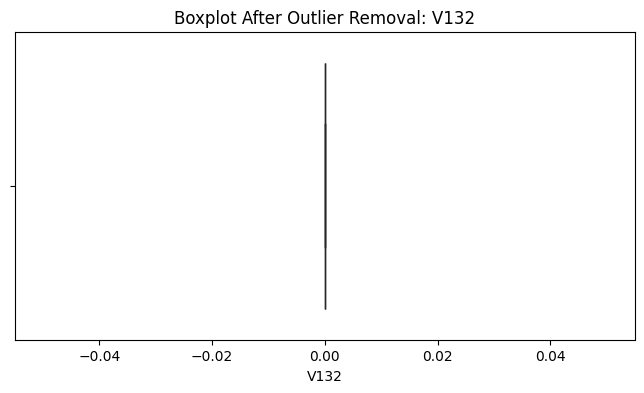

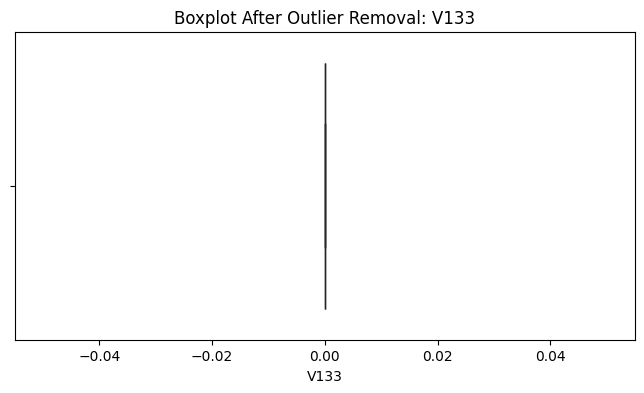

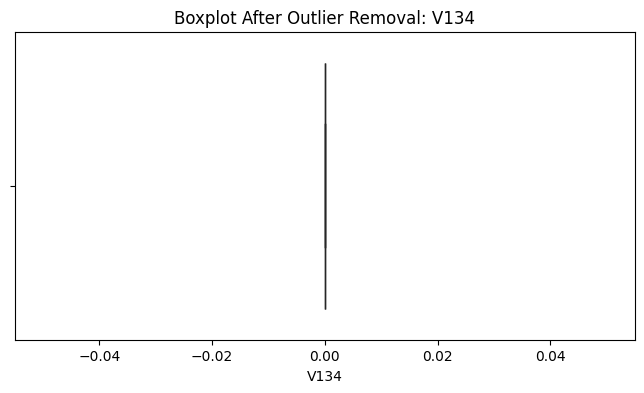

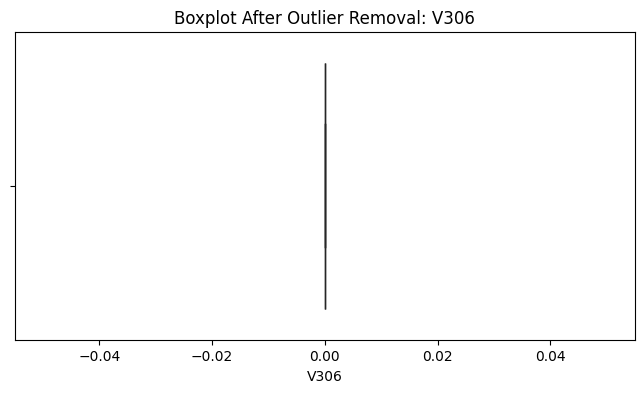

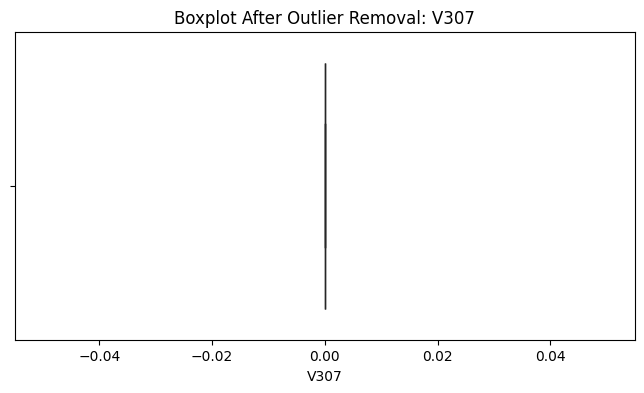

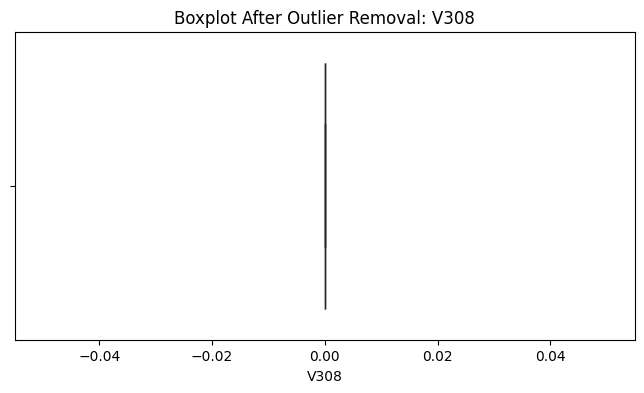

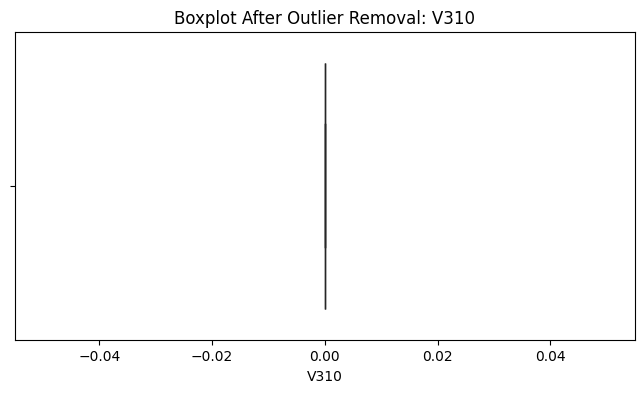

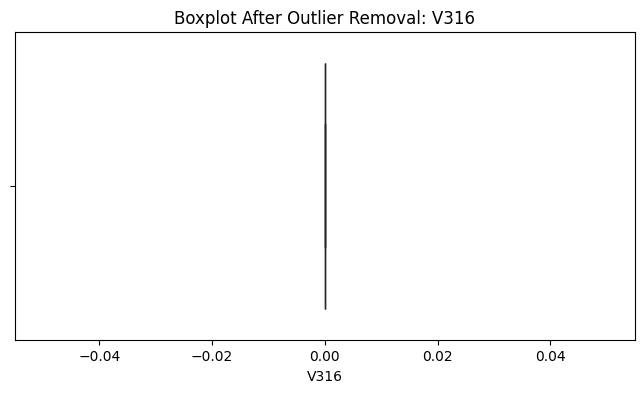

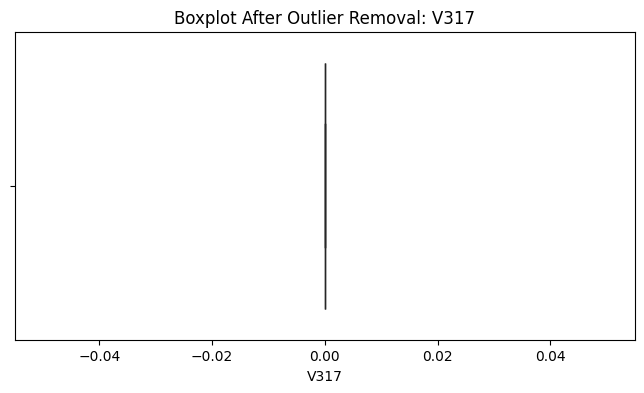

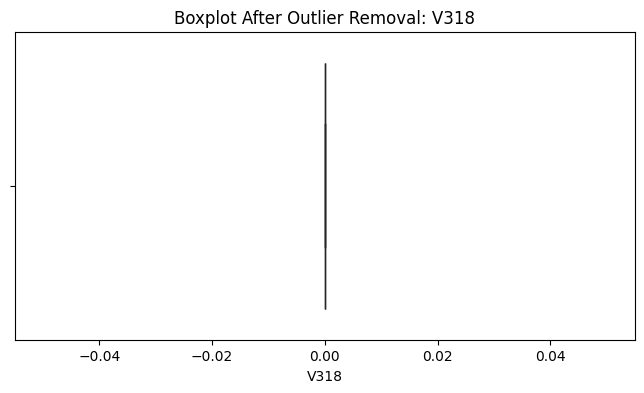

In [28]:
#lets visualize it
for col in skewed_cols.index:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_clean[col], color='teal')
    plt.title(f"Boxplot After Outlier Removal: {col}")
    plt.xlabel(col)
    plt.show()


We have successfully removed outliers from our data

###2.2.4 Multicoliiniarity

<Axes: >

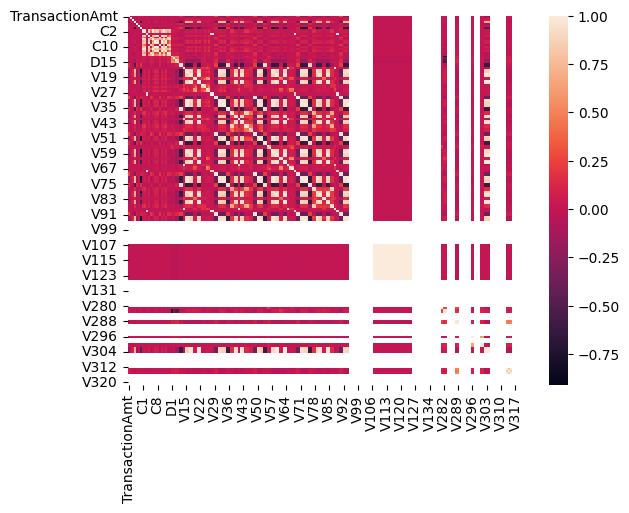

In [29]:
corr=df_clean.select_dtypes('number').drop(columns='isFraud').corr()
sns.heatmap(corr)

In [30]:
#lets see which numerical columns are highly correlated
import numpy as np

def find_high_collinearity(df_clean,threshold=0.8):
  num_df=df_clean.select_dtypes('number')
  corr_matrix=num_df.corr().abs()
  upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

  high_corr_pairs=[
      (col,row,upper_triangle.loc[row,col])
      for col in upper_triangle.columns
      for row in upper_triangle.index
      if pd.notnull(upper_triangle.loc[row,col]) and upper_triangle.loc[row,col] > threshold
  ]

  drop_candidates={pair[1] for pair in high_corr_pairs}
  return high_corr_pairs,drop_candidates,corr_matrix

In [31]:
high_corr_pairs, drop_candidates,corr_matrix=find_high_collinearity(df_clean,threshold=0.8)
print('High correlated pairs')
for pair in high_corr_pairs:
  print(f"{pair[0]} <-> {pair[1]} -> correlation= {pair[2]:.2f}")
print("\n REcommended columns to consider dropping",drop_candidates)

High correlated pairs
C2 <-> C1 -> correlation= 0.97
C4 <-> C2 -> correlation= 0.84
C6 <-> C1 -> correlation= 0.96
C6 <-> C2 -> correlation= 0.90
C7 <-> C4 -> correlation= 0.85
C8 <-> C2 -> correlation= 0.85
C8 <-> C4 -> correlation= 0.93
C8 <-> C7 -> correlation= 0.96
C9 <-> C5 -> correlation= 0.93
C10 <-> C2 -> correlation= 0.83
C10 <-> C4 -> correlation= 0.93
C10 <-> C7 -> correlation= 0.98
C10 <-> C8 -> correlation= 0.98
C11 <-> C1 -> correlation= 0.98
C11 <-> C2 -> correlation= 0.95
C11 <-> C4 -> correlation= 0.83
C11 <-> C6 -> correlation= 0.98
C11 <-> C8 -> correlation= 0.82
C12 <-> C2 -> correlation= 0.82
C12 <-> C4 -> correlation= 0.84
C12 <-> C7 -> correlation= 0.99
C12 <-> C8 -> correlation= 0.97
C12 <-> C10 -> correlation= 0.96
C13 <-> C5 -> correlation= 0.93
C13 <-> C9 -> correlation= 0.91
C14 <-> C1 -> correlation= 0.88
C14 <-> C6 -> correlation= 0.96
C14 <-> C9 -> correlation= 0.80
C14 <-> C11 -> correlation= 0.90
C14 <-> C13 -> correlation= 0.91
V13 <-> V12 -> correlati

In [32]:
#lets drop the columns that have low collinearity with isFraud Columns
def drop_less_predictive_correlated(df_clean,high_corr_pairs,target_col='isFraud'):
  nums_df=df_clean.select_dtypes('number')
  if target_col not in nums_df.columns:
    raise ValueError(f'Target Column {target_col} must be a numeric to compute correlation')

  target_corr=nums_df.corr()[target_col].abs()
  drop_list=[]
  summary_records=[]

  for col1,col2,corr_value in high_corr_pairs:
    if col1 not in nums_df.columns or col2 not in nums_df.columns:
      continue

    corr1=target_corr.get(col1,0)
    corr2=target_corr.get(col2,0)

    if corr1 >= corr2:
      drop_col=col2
      keep_col=col1
    else:
      drop_col=col1
      keep_col=col2

    drop_list.append(drop_col)

    summary_records.append({
        'feature1':col1,
        'feature2':col2,
        'correlatio_between_features':round(corr_value,3),
        f'{col1}_corr_with_{target_col}':round(corr1,3),
        f'{col2}_corr_with_{target_col}':round(corr2,3),
        'Dropped_columns':drop_col,
        'Keep_column':keep_col
    })
  df_reduced=df_clean.drop(columns=drop_list,errors='ignore')

  summary_df=pd.DataFrame(summary_records)

  if not summary_df.empty:
    print('\n High collinearity Summary')
    display(summary_df)
  else:
    print('No columns to drp based on High Collinearity')

  print(f'Original shape:{df_clean.shape} -> New shape{df_reduced.shape}')

  return summary_df, df_reduced, drop_list


In [33]:
summary_df,df_reduced, drop_list=drop_less_predictive_correlated(
    df_clean,
    high_corr_pairs,
    target_col='isFraud'
)


 High collinearity Summary


,feature1,feature2,correlatio_between_features,C2_corr_with_isFraud,C1_corr_with_isFraud,Dropped_columns,Keep_column,C4_corr_with_isFraud,C6_corr_with_isFraud,C7_corr_with_isFraud,...,V289_corr_with_isFraud,V288_corr_with_isFraud,V301_corr_with_isFraud,V300_corr_with_isFraud,V302_corr_with_isFraud,V303_corr_with_isFraud,V304_corr_with_isFraud,V314_corr_with_isFraud,V313_corr_with_isFraud,V315_corr_with_isFraud
0,C2,C1,0.971,0.129,0.111,C1,C2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C4,C2,0.841,0.129,NaN,C4,C2,0.073,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C6,C1,0.959,NaN,0.111,C6,C1,NaN,0.043,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C6,C2,0.900,0.129,NaN,C6,C2,NaN,0.043,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C7,C4,0.845,NaN,NaN,C4,C7,0.073,NaN,0.088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,V304,V302,1.000,NaN,NaN,V302,V304,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.196,NaN,0.196,NaN,NaN,NaN
994,V304,V303,1.000,NaN,NaN,V303,V304,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.196,0.196,NaN,NaN,NaN
995,V314,V313,0.829,NaN,NaN,V313,V314,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013,0.012,NaN
996,V315,V313,0.975,NaN,NaN,V313,V315,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012,0.012


Original shape:(140554, 199) -> New shape(140554, 94)


##2.3 Exploratory Data Analysis(EDA)

For thismproject we are going to focus on Individuals who have been flagged fro fraud. The column is identified in the 'isFraud' column

In [34]:
#lets mask the individuals who have been flagged for fraud
mask = df_reduced.isFraud==1
df_fear=df_reduced[mask]
print(df_fear.shape)
df_fear.head()

(4868, 94)


,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V310,V311,V312,V314,V316,V317,V318,V319,V320,V321
144473,1.0,37.098,C,13413.0,103.0,185.0,visa,137.0,credit,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144521,1.0,155.521,C,16578.0,545.0,185.0,visa,226.0,credit,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144638,1.0,90.570,C,4504.0,500.0,185.0,mastercard,219.0,credit,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145102,1.0,83.380,C,9026.0,545.0,185.0,visa,137.0,credit,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145156,1.0,774.000,W,5033.0,269.0,150.0,mastercard,224.0,debit,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2.3.1 EDA for Transaction Amount

In [35]:
df_reduced.TransactionAmt.describe()

,TransactionAmt
count,140554.000000
mean,160.898860
std,316.616979
min,0.292000
25%,35.950000
50%,59.000000
75%,129.000000
max,5543.230000


The maximum amount transacted is 5543.23 and the lowest amoutn transacted is 0.29200

In [36]:
#lets plot the histogram of transactio amount
fig=px.histogram(
    df_fear,
    x='TransactionAmt',
    title='Distribution of Transactio Amount'
)
fig.show()

Fraudulent behavior tends to cluster around low-value transactions, possibly to avoid triggering automated fraud alerts or spending limits.

Most fraudulent activity involves low-risk probing behavior — small purchases to test the card.
A few rare but very high-value outliers may correspond to full-blown card misuse after the test succeeds.

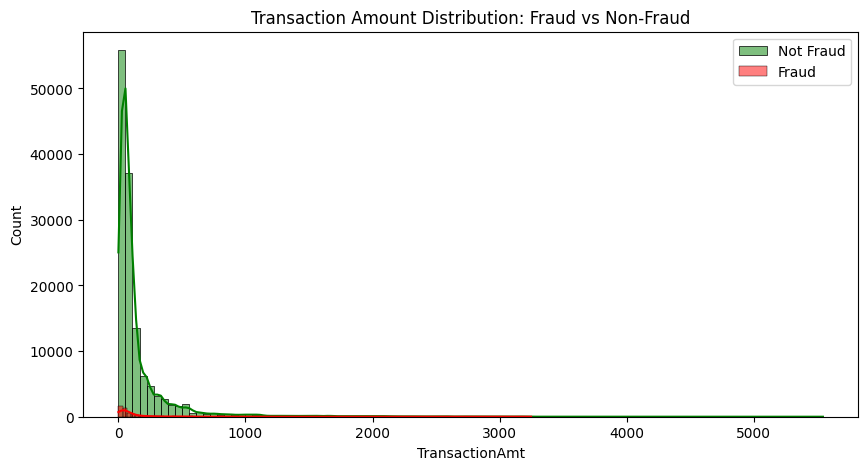

In [37]:
#lets compare with non-fraud activities
plt.figure(figsize=(10,5))
sns.histplot(df_reduced[df_reduced['isFraud']==0]['TransactionAmt'], bins=100, kde=True, color='green', label='Not Fraud')
sns.histplot(df_reduced[df_reduced['isFraud']==1]['TransactionAmt'], bins=100, kde=True, color='red', label='Fraud', alpha=0.5)
plt.legend()
plt.title("Transaction Amount Distribution: Fraud vs Non-Fraud")
plt.show()


Both fraud and normal transactions are dominated by low-value payments, but the fraud subset is much smaller and more concentrated near zero.

###2.3.2 EDA for Card4

In [38]:
df_fear.card4.nunique()

4

We have 4 unique features in our card4 column

In [39]:
#lets explore the unique features
df_fear.card4.unique()

array(['visa', 'mastercard', 'discover', 'american express', nan],
      dtype=object)

<Axes: xlabel='card Type', ylabel='Frequency'>

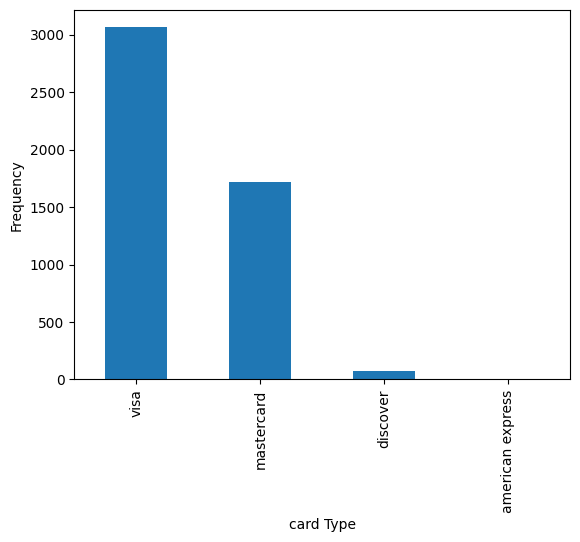

In [40]:
df_fear.card4.value_counts().plot(kind='bar',xlabel='card Type',ylabel='Frequency')

In [41]:
#lets calculate the fraud rate by card type
fraud_analysis = df_reduced.groupby('card4').agg({
    'TransactionAmt': 'count',
    'isFraud': 'sum'
}).rename(columns={
    'TransactionAmt': 'total_transactions',
    'isFraud': 'fraud_count'
})

fraud_analysis['fraud_rate_percent'] = (fraud_analysis['fraud_count'] / fraud_analysis['total_transactions']) * 100
fraud_analysis['legitimate_count'] = fraud_analysis['total_transactions'] - fraud_analysis['fraud_count']
fraud_analysis['legitimate_rate_percent'] = 100 - fraud_analysis['fraud_rate_percent']

print(fraud_analysis)

                  total_transactions  fraud_count  fraud_rate_percent  \
card4                                                                   
american express                 183          1.0            0.546448   
discover                        1388         72.0            5.187320   
mastercard                     48869       1718.0            3.515521   
visa                           89643       3063.0            3.416887   

                  legitimate_count  legitimate_rate_percent  
card4                                                        
american express             182.0                99.453552  
discover                    1316.0                94.812680  
mastercard                 47151.0                96.484479  
visa                       86580.0                96.583113  


/tmp/ipython-input-2911984788.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




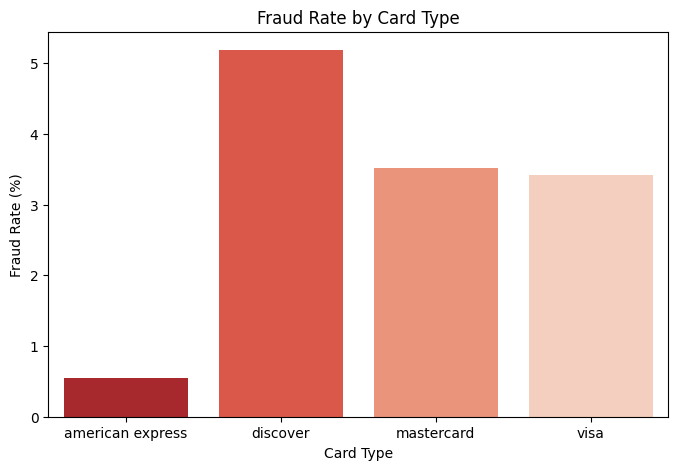

In [42]:
#lets visualize it

plt.figure(figsize=(8,5))
sns.barplot(x=fraud_analysis.index, y='fraud_rate_percent', data=fraud_analysis, palette='Reds_r')
plt.title("Fraud Rate by Card Type")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("Card Type")
plt.show()


Discover cards have the highest fraud rate, at just over 5% of all Discover transactions.
→ This suggests Discover transactions are disproportionately targeted by fraudsters, even though they make up a smaller portion of total activity.

Visa and Mastercard both show moderate fraud rates around 3.5%, but because they account for the majority of all transactions, they represent the largest share of overall fraud volume.
→ In other words, most fraud cases happen on Visa and Mastercard simply because these cards are used the most often.

American Express has the lowest fraud rate, less than 1% of its transactions.
→ This could be due to tighter verification processes, a smaller customer base, or stronger security protocols.



/tmp/ipython-input-4211161128.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



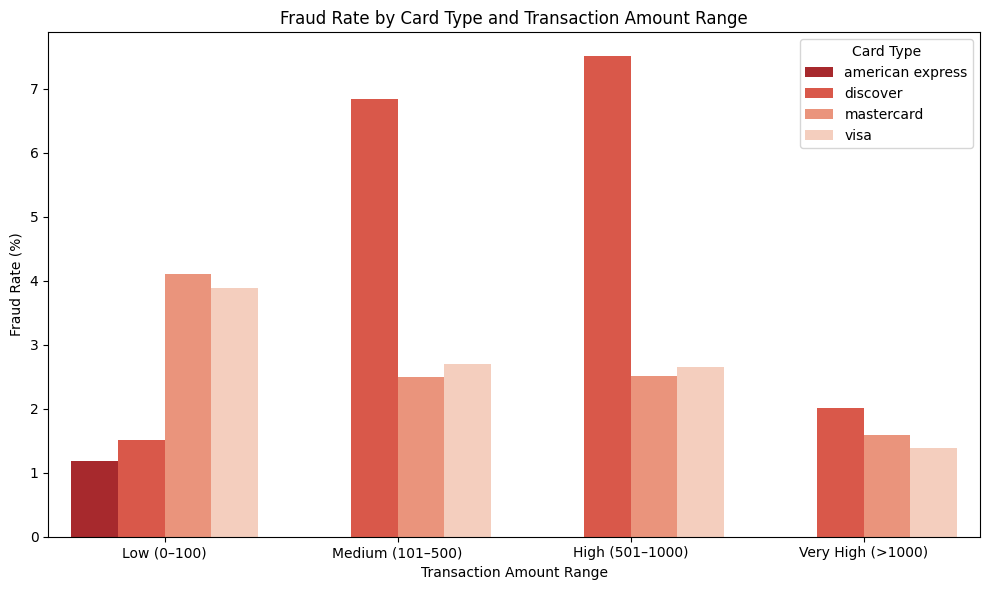

In [43]:
#lets see the fraud rate with transation amount range

bins = [0, 100, 500, 1000, df_reduced['TransactionAmt'].max()]
labels = ['Low (0–100)', 'Medium (101–500)', 'High (501–1000)', 'Very High (>1000)']
df_reduced['amount_range'] = pd.cut(df_reduced['TransactionAmt'], bins=bins, labels=labels, include_lowest=True)


fraud_by_card_amount = df_reduced.groupby(['card4', 'amount_range']).agg(
    total_transactions=('isFraud', 'count'),
    fraud_count=('isFraud', 'sum')
).reset_index()


fraud_by_card_amount['fraud_rate_percent'] = (
    fraud_by_card_amount['fraud_count'] / fraud_by_card_amount['total_transactions']
) * 100


fraud_by_card_amount = fraud_by_card_amount.sort_values(['card4', 'amount_range'])


plt.figure(figsize=(10,6))
sns.barplot(
    data=fraud_by_card_amount,
    x='amount_range',
    y='fraud_rate_percent',
    hue='card4',
    palette='Reds_r'
)
plt.title('Fraud Rate by Card Type and Transaction Amount Range')
plt.ylabel('Fraud Rate (%)')
plt.xlabel('Transaction Amount Range')
plt.legend(title='Card Type')
plt.tight_layout()
plt.show()


Based on our analysis of fraud rates across card types and transaction amounts, American Express consistently demonstrates the highest vulnerability with very high fraud rates across all amount ranges, particularly for medium to high-value transactions (101–1000) dollars, while Discover also shows elevated risk, especially for transactions over 500 dollars. In contrast, Visa presents the most stable and lowest fraud risk profile, with Mastercard falling in the middle. This clear stratification indicates that fraud risk is not uniform and necessitates a tailored detection strategy, with immediate priority on enhancing monitoring and authentication measures for American Express and Discover cards, particularly for transactions exceeding $100, to effectively mitigate the most significant financial exposures.

###2.3.3 EDA for Card6

These are some of the questions we want to answer:

  1. Which card type has the highest fraud rate?

  2. Do certain card types attract higher-value fraudulent transactions?

  3. Are there temporal patterns specific to card types?

  4. How does card type interact with other features?

  5. Is the distribution of card types different between fraudulent and legitimate transactions?

####2.3.3.1 Card Distribution Analysis

In [44]:
card_type_pct=df_reduced.card6.value_counts(normalize=True)*100
card_type_dist=df_reduced.card6.value_counts()
print("Card Type Distribution:")
for card_type, count in card_type_dist.items():
    print(f"{card_type}: {count} ({card_type_pct[card_type]:.2f}%)")

Card Type Distribution:
debit: 104117 (74.33%)
credit: 35948 (25.66%)
charge card: 11 (0.01%)
debit or credit: 7 (0.00%)


####2.3.3.2 Fraud Analysis by card

In [45]:
# Fraud rate by card type
fraud_by_card = df_reduced.groupby('card6')['isFraud'].agg(['count', 'sum', 'mean'])
fraud_by_card['fraud_rate'] = fraud_by_card['mean'] * 100
fraud_by_card = fraud_by_card.rename(columns={'count': 'total_transactions', 'sum': 'fraud_count', 'mean': 'fraud_rate_decimal'})

print("\nFraud Analysis by Card Type:")
print(fraud_by_card[['total_transactions', 'fraud_count', 'fraud_rate']])


Fraud Analysis by Card Type:
                 total_transactions  fraud_count  fraud_rate
card6                                                       
charge card                      11          0.0    0.000000
credit                        35948       2712.0    7.544231
debit                        104117       2142.0    2.057301
debit or credit                   7          0.0    0.000000


Credit cards are by far our highest-risk product. They are 3.5 times more likely to be used in a fraudulent transaction compared to the average card and over 3.6 times more likely than debit cards.

Debit cards, while having more fraud attempts in total numbers, have a significantly lower fraud rate. This means that for any given debit card transaction, the chance of it being fraudulent is much lower.

Charge cards and hybrid "debit or credit" cards show no fraud in our current data. However, the number of transactions for these types is very small, so this result is not statistically reliable.

Immediate Focus on Credit Cards: We should immediately review and strengthen our fraud detection rules specifically for credit card transactions. This is our area of greatest financial exposure.

Maintain Vigilance on Debit Cards: Although the fraud rate is lower, the high volume of debit card transactions means we still experience a large number of fraud incidents. Our current systems for debit cards are effective but should not be relaxed.

Monitor Niche Card Types: We should keep an eye on charge and hybrid cards as their usage grows, but they are not a current priority for anti-fraud resources.

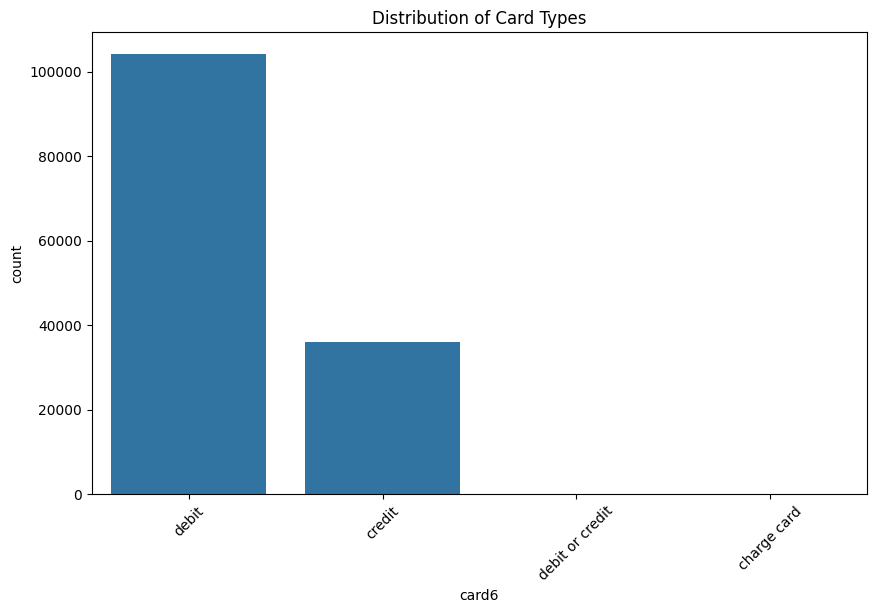

In [46]:
#lets visualize it
plt.figure(figsize=(10, 6))
sns.countplot(data=df_reduced, x='card6', order=df['card6'].value_counts().index)
plt.title('Distribution of Card Types')
plt.xticks(rotation=45)
plt.show()

####2.3.3.3 Transaction pattern by Card Type

In [47]:
#lets determine the average transaction amount
amount_by_card = df_reduced.groupby('card6')['TransactionAmt'].agg(['mean', 'median', 'std', 'count'])
print("\nTransaction Amount Statistics by Card Type:")
print(amount_by_card)


Transaction Amount Statistics by Card Type:
                       mean    median         std   count
card6                                                    
charge card       40.210727   23.0870   40.009899      11
credit           248.780820   87.7805  438.706779   35948
debit            130.457065   59.0000  254.187019  104117
debit or credit  167.205714  160.4700  106.041908       7


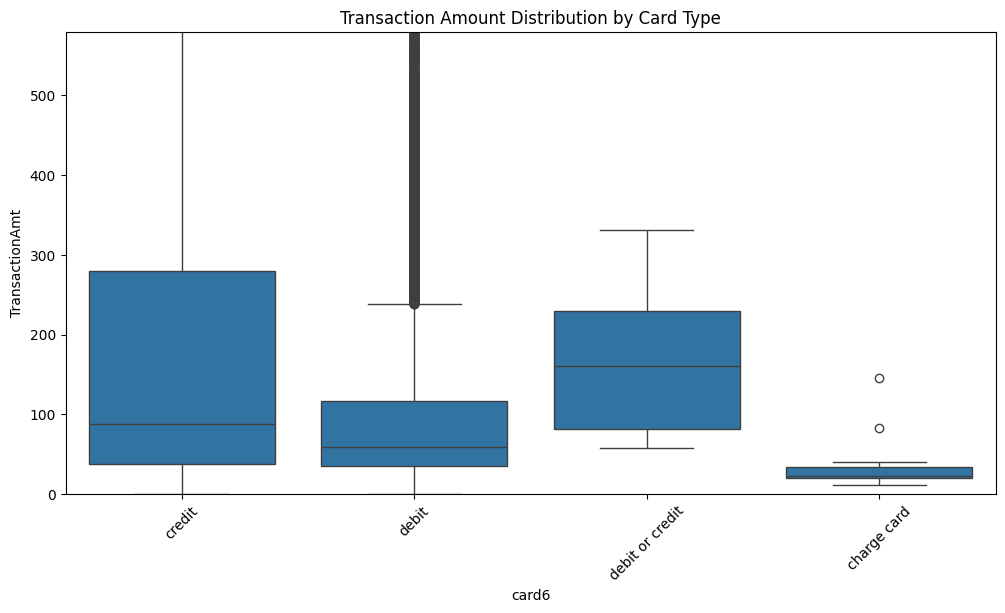

In [48]:
#lets plot the anount distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_reduced, x='card6', y='TransactionAmt')
plt.ylim(0, df_reduced['TransactionAmt'].quantile(0.95))
plt.title('Transaction Amount Distribution by Card Type')
plt.xticks(rotation=45)
plt.show()

####2.3.3.4 Cross-Feature Analysis

In [49]:
#lets cross feature it with ProductCD
# If you have product category feature
if 'ProductCD' in df_reduced.columns:
    cross_tab = pd.crosstab(df_reduced['card6'], df_reduced['ProductCD'], normalize='index') * 100
    print("\nProduct Category Distribution by Card Type (%):")
    print(cross_tab)


Product Category Distribution by Card Type (%):
ProductCD                 C         H         R           W
card6                                                      
charge card      100.000000  0.000000  0.000000    0.000000
credit            39.988316  1.274063  1.777568   56.960053
debit             20.875553  0.254521  0.219945   78.649980
debit or credit    0.000000  0.000000  0.000000  100.000000


We can now spot fishy transactions:

1. A debit card buying Product C? → High Risk (should be rare)

2. A charge card buying anything BUT Product C? → Very High Risk (never happens normally)

3. A credit card suddenly switching from W to C? → Medium Risk (worth checking)

Our analysis reveals that each card type has a unique spending personality that we can use to spot fraud more effectively. Debit cards are used almost exclusively for Product W (79% of transactions), credit cards show a balanced mix between Products W and C, while charge cards are used exclusively for Product C. This means we can now flag suspicious transactions where the purchase doesn't match the card's normal pattern—like a debit card buying Product C or a charge card buying anything other than Product C—allowing us to catch fraudulent activity that would otherwise go unnoticed.

###2.3.4 EDA for ProductCD

These are the questions we would like to answer:
1. Which product category has the highest fraud rate?

2. Which products have the highest financial impact?

3. Are there specific times when certain products are more vulnerable?

4. Do fraudsters prefer certain products with specific card types?

5. Which products show unusual transaction amount patterns?

6. Are there products where fraud is concentrated among certain customer segments?

####2.3.4.1 Distribution Analysis for ProductCD

Product Category Distribution:
Product W: 102722 transactions (73.08%)
Product C: 36241 transactions (25.78%)
Product R: 868 transactions (0.62%)
Product H: 723 transactions (0.51%)


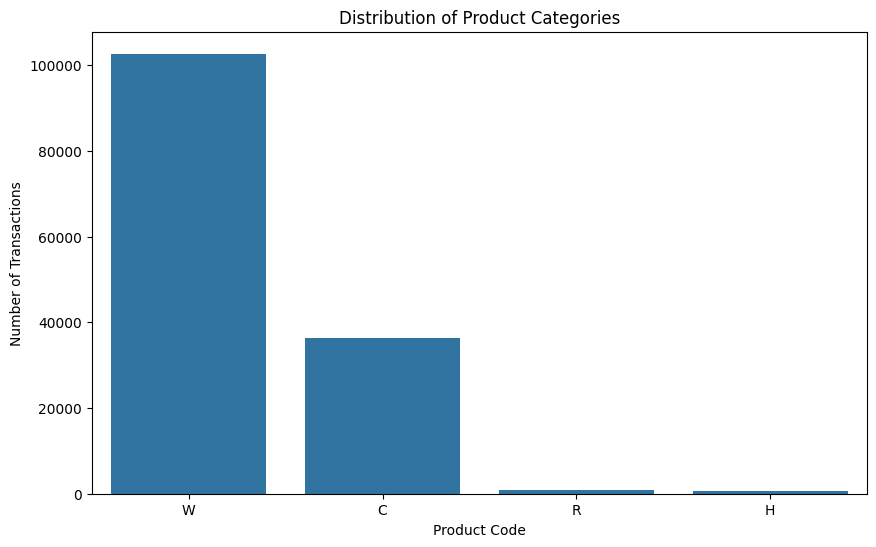

In [50]:
# Product distribution and percentages
product_dist = df_reduced['ProductCD'].value_counts()
product_pct = df_reduced['ProductCD'].value_counts(normalize=True) * 100

print("Product Category Distribution:")
for product, count in product_dist.items():
    print(f"Product {product}: {count} transactions ({product_pct[product]:.2f}%)")

# lest visualize Visualization
plt.figure(figsize=(10, 6))
sns.countplot(data=df_reduced, x='ProductCD', order=product_dist.index)
plt.title('Distribution of Product Categories')
plt.xlabel('Product Code')
plt.ylabel('Number of Transactions')
plt.show()

Product W is the overwhelming favorite, accounting for nearly three-quarters (73%) of all our transactions. This means that for every four purchases a customer makes, three of them are for this single product category.

What the business should do:
1. Operational Focus: The vast majority of our fraud detection, customer service, and operational processes revolve around Product W. Any issues or improvements here will impact most of our customers.

2. Risk Concentration: Because Product W is so dominant, a new type of fraud targeting this product would pose a significant threat to our entire business.

3. Strategic Insight: This heavy reliance on one product may also represent a growth opportunity. Understanding why Product W is so popular could help us promote Products C, R, and H more effectively.

#### 2.3.4.2 Fraud Analysis by Product Category

In [51]:
# Fraud rate by product
fraud_by_product = df_reduced.groupby('ProductCD')['isFraud'].agg(['count', 'sum', 'mean'])
fraud_by_product['fraud_rate'] = fraud_by_product['mean'] * 100
fraud_by_product = fraud_by_product.rename(columns={
    'count': 'total_transactions',
    'sum': 'fraud_count',
    'mean': 'fraud_rate_decimal'
})

print("\nFraud Analysis by Product Category:")
print(fraud_by_product[['total_transactions', 'fraud_count', 'fraud_rate']].sort_values('fraud_rate', ascending=False))


Fraud Analysis by Product Category:
           total_transactions  fraud_count  fraud_rate
ProductCD                                             
C                       36241       3496.0    9.646533
W                      102722       1367.0    1.330776
H                         723          3.0    0.414938
R                         868          2.0    0.230415


Product C has an alarmingly high fraud rate of 9.6%, meaning nearly 1 in every 10 transactions for this product is fraudulent. This is over 7 times higher than our overall average and represents our most significant point of financial loss.

In contrast, our most popular product, Product W, has a much lower fraud rate (1.3%), which is manageable given its high volume. Products H and R show minimal fraud activity.

Immediate application and Actions:

1. Priority Investigation: We must immediately investigate Product C to understand why it is being targeted so heavily. This could be due to its nature, resale value, or digital delivery process.

2. Resource Allocation: We should instantly redirect a significant portion of our fraud prevention resources and apply the strictest security measures to all Product C transactions.

3. Urgent Review: The product listing, payment flow, and delivery system for Product C need an urgent security audit.

####2.3.4.3 Transaction Amount Pattern


Transaction Amount Statistics by Product:
                 mean   median         std     min       max
ProductCD                                                   
C           45.089852   32.385   40.717256   0.292   712.896
H           71.038728   50.000   48.970664  15.000   450.000
R          167.050691  125.000  139.595518  25.000  1000.000
W          202.337533   87.950  360.408827   4.000  5543.230


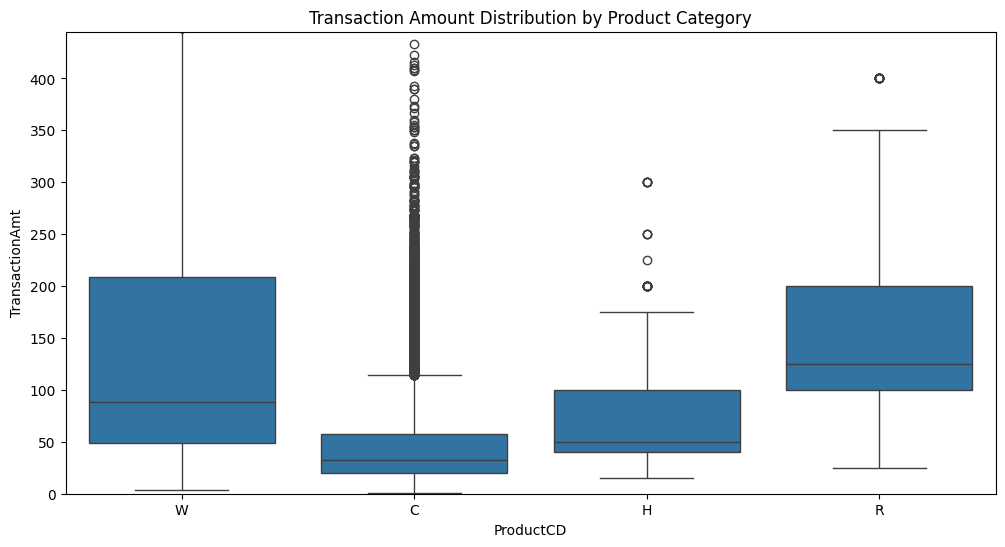

In [52]:
# Amount statistics by product
amount_stats = df_reduced.groupby('ProductCD')['TransactionAmt'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nTransaction Amount Statistics by Product:")
print(amount_stats)

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_reduced , x='ProductCD', y='TransactionAmt')
plt.ylim(0, df['TransactionAmt'].quantile(0.95))  # Remove extreme outliers
plt.title('Transaction Amount Distribution by Product Category')
plt.show()

###2.3.5 Class

#### 2.3.5.1 Class Distribution Analysis

=== FRAUD CLASS DISTRIBUTION ===
Legitimate Transactions (0): 135,686 (96.5366%)
Fraudulent Transactions (1): 4,868 (3.4634%)
Total Transactions: 734,773
Imbalance Ratio: 27.9:1


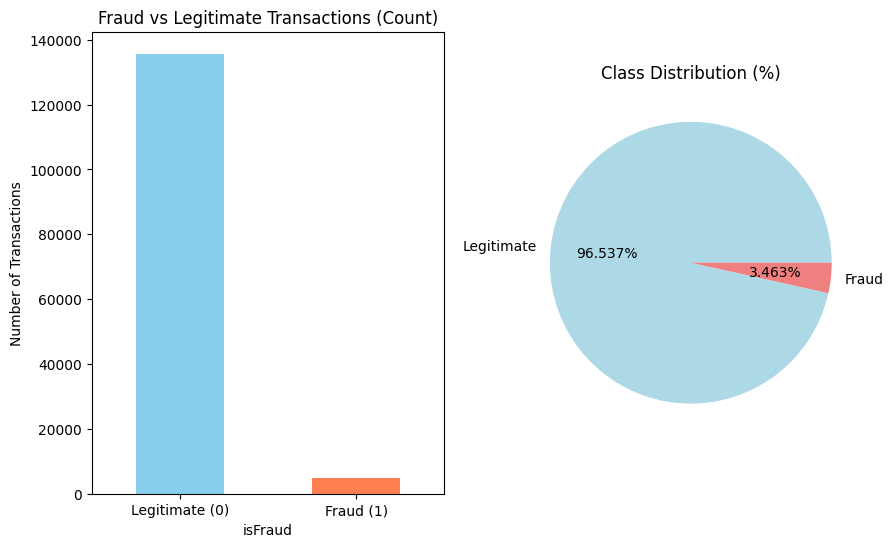

In [53]:
# Basic class distribution
fraud_distribution = df_reduced['isFraud'].value_counts()
fraud_percentage = df_reduced['isFraud'].value_counts(normalize=True) * 100

print("=== FRAUD CLASS DISTRIBUTION ===")
print(f"Legitimate Transactions (0): {fraud_distribution[0]:,} ({fraud_percentage[0]:.4f}%)")
print(f"Fraudulent Transactions (1): {fraud_distribution[1]:,} ({fraud_percentage[1]:.4f}%)")
print(f"Total Transactions: {len(df):,}")
print(f"Imbalance Ratio: {fraud_distribution[0]/fraud_distribution[1]:.1f}:1")

# Visualization
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
fraud_distribution.plot(kind='bar', color=['skyblue', 'coral'])
plt.title('Fraud vs Legitimate Transactions (Count)')
plt.xlabel('isFraud')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Legitimate (0)', 'Fraud (1)'], rotation=0)

plt.subplot(1, 2, 2)
plt.pie(fraud_percentage, labels=['Legitimate', 'Fraud'], autopct='%1.3f%%', colors=['lightblue', 'lightcoral'])
plt.title('Class Distribution (%)')
plt.show()

Our analysis reveals that while the vast majority of transactions,over 96.5%,are completely legitimate, we're dealing with a significant fraud problem that affects nearly 3.5% of all transactions. To put this in perspective, for every fraudulent transaction we catch, there are about 28 legitimate ones, making fraud detection challenging but critically important. This level of fraud activity represents a substantial financial risk that requires sophisticated detection systems to identify the fraudulent patterns hidden within the overwhelming volume of normal customer activity.

####2.3.5.2 Key Fraud Metrics

In [54]:
# Calculate key business metrics
print("=== KEY FRAUD METRICS ===")
total_fraud_amount = df_reduced[df_reduced['isFraud'] == 1]['TransactionAmt'].sum()
total_transaction_amount = df_reduced['TransactionAmt'].sum()
fraud_percentage_of_revenue = (total_fraud_amount / total_transaction_amount) * 100

print(f"Total Fraud Amount: ${total_fraud_amount:,.2f}")
print(f"Total Transaction Volume: ${total_transaction_amount:,.2f}")
print(f"Fraud as % of Revenue: {fraud_percentage_of_revenue:.4f}%")

# Average fraud transaction value vs legitimate
avg_fraud_amount = df[df['isFraud'] == 1]['TransactionAmt'].mean()
avg_legit_amount = df[df['isFraud'] == 0]['TransactionAmt'].mean()
print(f"Average Fraud Transaction: ${avg_fraud_amount:.2f}")
print(f"Average Legitimate Transaction: ${avg_legit_amount:.2f}")
print(f"Ratio: {avg_fraud_amount/avg_legit_amount:.2f}x")

=== KEY FRAUD METRICS ===
Total Fraud Amount: $583,626.67
Total Transaction Volume: $22,614,978.42
Fraud as % of Revenue: 2.5807%
Average Fraud Transaction: $149.24
Average Legitimate Transaction: $134.51
Ratio: 1.11x


Our analysis shows that fraudulent activities are costing us a significant amount of money, directly impacting our bottom line. The total amount lost to fraud has reached over 583,000, which represents 2.58% of our total transaction revenue. This means for every $100 processed, we are losing about 2.58 to fraudsters.

While the average fraudulent transaction is only slightly larger (about 11%) than a legitimate one, the sheer volume of these incidents adds up to a substantial financial drain. In short, fraud is not just a security issue—it's a direct and measurable financial loss that we need to address to protect our revenue.

##2.4 Split

In [55]:
#lets select the features that we are going to custer
x_cluster=df_reduced[['TransactionAmt','card4','card6','ProductCD']].copy()
x_cluster

,TransactionAmt,card4,card6,ProductCD
144234,29.000,mastercard,credit,W
144238,49.000,visa,debit,W
144239,159.000,visa,debit,W
144240,422.500,visa,debit,W
144244,16.495,mastercard,debit,C
...,...,...,...,...
734762,73.838,mastercard,credit,C
734763,400.780,mastercard,credit,W
734767,67.505,mastercard,debit,C
734769,39.500,mastercard,debit,W


##2.5 Feature Engineering

In [56]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score


In [57]:
#lect check for the unique features in the categorical columns
print('\nUnique features for the Categorical Features')
for col in x_cluster.select_dtypes('object'):
  print(f'{col}:{x_cluster[col].nunique()} unique values - {x_cluster[col].unique()}')


Unique features for the Categorical Features
card4:4 unique values - ['mastercard' 'visa' 'discover' 'american express' nan]
card6:4 unique values - ['credit' 'debit' 'debit or credit' 'charge card' nan]
ProductCD:4 unique values - ['W' 'C' 'H' 'R']


In [58]:
#handle the missing values
print('\nMissing Values')
print(x_cluster.isna().sum())


Missing Values
TransactionAmt      0
card4             471
card6             471
ProductCD           0
dtype: int64


In [59]:
#fill in the missing values
x_cluster['card4']=x_cluster['card4'].fillna('unkown')
x_cluster['card6']=x_cluster['card6'].fillna('unkown')

In [60]:
x_encoded = x_cluster.copy()

In [61]:
#lets label the categorical features
label_encoders={}
for col in x_encoded.select_dtypes('object'):
  le=LabelEncoder()
  x_encoded[col]=le.fit_transform(x_encoded[col].astype(str))
  label_encoders[col]=le
  print(f'{col} encoding: {dict(zip(le.classes_,le.transform(le.classes_)))}')

card4 encoding: {'american express': np.int64(0), 'discover': np.int64(1), 'mastercard': np.int64(2), 'unkown': np.int64(3), 'visa': np.int64(4)}
card6 encoding: {'charge card': np.int64(0), 'credit': np.int64(1), 'debit': np.int64(2), 'debit or credit': np.int64(3), 'unkown': np.int64(4)}
ProductCD encoding: {'C': np.int64(0), 'H': np.int64(1), 'R': np.int64(2), 'W': np.int64(3)}


In [62]:
#lets standardize all the features
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x_encoded)
print(f'Final clusterning shape data:{x_scaled.shape}')

Final clusterning shape data:(140554, 4)


## 2.6 Build Model

### 2.6.1 Determine the Optimal Number of clusters

In [63]:
#find the optimal k
inertia=[]
silhouette_scores=[]
k_range=range(2,10)

for k in k_range:
  kmean=KMeans(n_clusters=k,random_state=42,n_init=10)
  cluster_labels=kmean.fit_predict(x_scaled)
  inertia.append(kmean.inertia_)
  silhouette_scores.append(silhouette_score(x_scaled,cluster_labels))

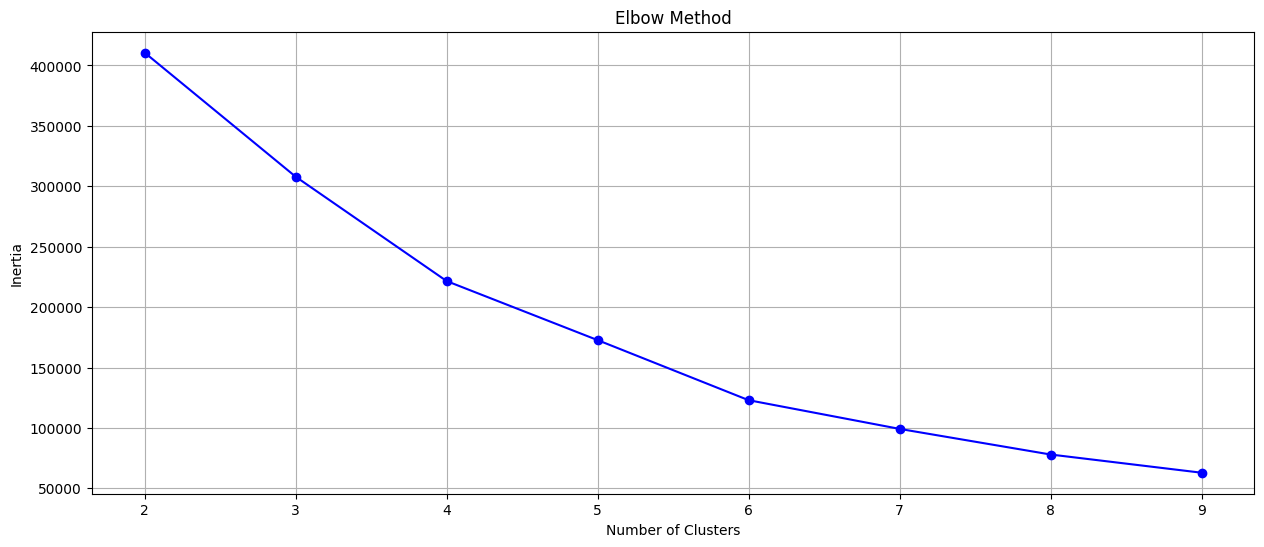

In [64]:
#lets visualize it
plt.figure(figsize=(15,6))

plt.plot(k_range,inertia,'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.title('Elbow Method')
plt.grid(True)

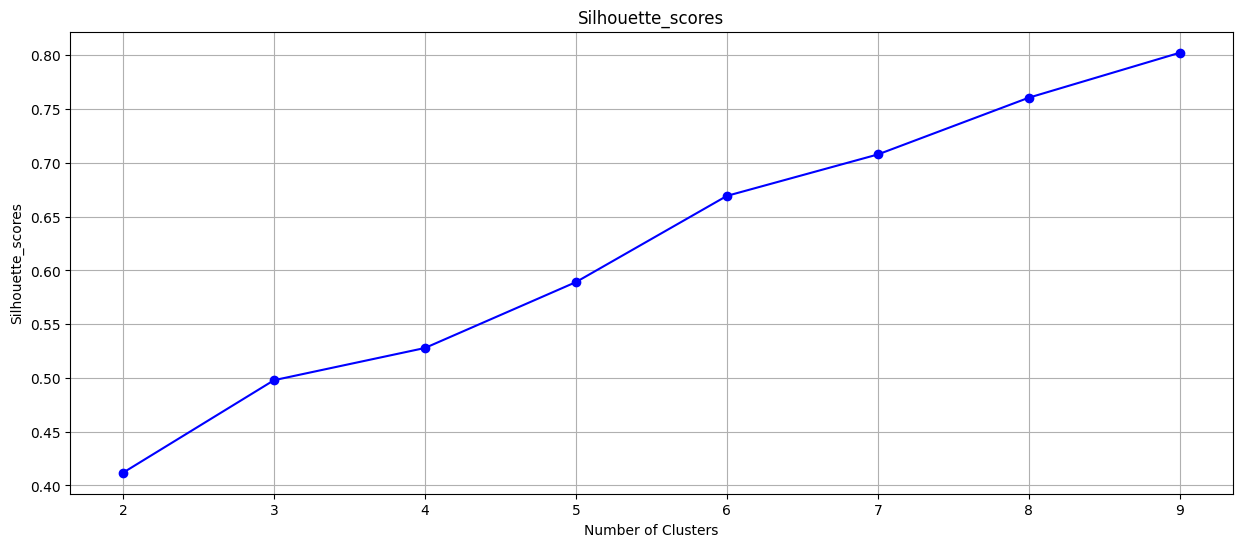

In [65]:
#plot the silhouette_scores
plt.figure(figsize=(15,6))

plt.plot(k_range,silhouette_scores,'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel("Silhouette_scores")
plt.title('Silhouette_scores')
plt.grid(True)

Our optimal value for K is 4

In [66]:
#recommended optimal number of k
optimal_k=4
print(f'Recommended optimal Number of k = {optimal_k}')

Recommended optimal Number of k = 4


###2.6.2 Applying clustering  and Analyze

In [67]:
kmean=KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
cluster_labels=kmean.fit_predict(x_scaled)

#add cluster labels to original dataframe
df_reduced['Business_clusters']=cluster_labels
print('Cluster Distribution')
cluster_dist=df_reduced['Business_clusters'].value_counts().sort_index()
print(cluster_dist)

Cluster Distribution
Business_clusters
0    65051
1    34584
2    36855
3     4064
Name: count, dtype: int64


###2.6.3 Deeper Cluster analysis and Intepretation

In [68]:
# Analyze cluster characteristics
cluster_analysis = df_reduced.groupby('Business_clusters').agg({
    'TransactionAmt': ['mean', 'median', 'std', 'count'],
    'card4': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'unknown',
    'card6': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'unknown',
    'ProductCD': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'unknown',
    'isFraud': ['mean', 'sum']
}).round(2)

cluster_analysis.columns = ['avg_amount', 'median_amount', 'std_amount', 'transaction_count',
                           'common_card4', 'common_card6', 'common_product',
                           'fraud_rate', 'fraud_count']

cluster_analysis['fraud_rate_pct'] = (cluster_analysis['fraud_rate'] * 100).round(2)
cluster_analysis['cluster_size_pct'] = (cluster_analysis['transaction_count'] / len(df) * 100).round(2)

print("=== BUSINESS CLUSTER PROFILES ===")
print(cluster_analysis.sort_values('fraud_rate', ascending=False))

=== BUSINESS CLUSTER PROFILES ===
                   avg_amount  median_amount  std_amount  transaction_count  \
Business_clusters                                                             
2                       45.51          32.69       40.95              36855   
3                     1648.46        1459.60      709.85               4064   
1                      151.93          87.00      167.96              34584   
0                      138.11          77.00      151.09              65051   

                  common_card4 common_card6 common_product  fraud_rate  \
Business_clusters                                                        
2                         visa        debit              C        0.09   
3                         visa       credit              W        0.02   
1                   mastercard        debit              W        0.01   
0                         visa        debit              W        0.01   

                   fraud_count  fraud_rate_pct

In [69]:
#lets visualize them
# Generate interpretable cluster descriptions
cluster_profiles = []

for cluster_id in range(optimal_k):
    cluster_data = df_reduced[df_reduced['Business_clusters'] == cluster_id]

    profile = {
        'cluster_id': cluster_id,
        'size': len(cluster_data),
        'size_pct': len(cluster_data) / len(df) * 100,
        'avg_transaction_amount': cluster_data['TransactionAmt'].mean(),
        'fraud_rate': cluster_data['isFraud'].mean() * 100,
        'dominant_product': cluster_data['ProductCD'].mode()[0],
        'dominant_card_type': cluster_data['card6'].mode()[0],
        'dominant_card_brand': cluster_data['card4'].mode()[0]
    }
    cluster_profiles.append(profile)

# Create readable cluster descriptions
print("=== BUSINESS CLUSTER PROFILES ===")
for profile in sorted(cluster_profiles, key=lambda x: x['fraud_rate'], reverse=True):
    print(f"""
    CLUSTER {profile['cluster_id']}:
    • Size: {profile['size']:,} transactions ({profile['size_pct']:.1f}%)
    • Fraud Rate: {profile['fraud_rate']:.2f}% { '!'if profile['fraud_rate'] > 5 else ""}
    • Average Amount: ${profile['avg_transaction_amount']:.2f}
    • Typical Transaction: {profile['dominant_card_brand']} {profile['dominant_card_type']} card for {profile['dominant_product']}
    """)

=== BUSINESS CLUSTER PROFILES ===

    CLUSTER 2:
    • Size: 36,855 transactions (5.0%)
    • Fraud Rate: 9.49% !
    • Average Amount: $45.51
    • Typical Transaction: visa debit card for C
    

    CLUSTER 3:
    • Size: 4,064 transactions (0.6%)
    • Fraud Rate: 1.97% 
    • Average Amount: $1648.46
    • Typical Transaction: visa credit card for W
    

    CLUSTER 0:
    • Size: 65,051 transactions (8.9%)
    • Fraud Rate: 1.31% 
    • Average Amount: $138.11
    • Typical Transaction: visa debit card for W
    

    CLUSTER 1:
    • Size: 34,584 transactions (4.7%)
    • Fraud Rate: 1.26% 
    • Average Amount: $151.93
    • Typical Transaction: mastercard debit card for W
    


The clustering analysis revealed four distinct business segments with varying transaction behaviors and fraud risks. Cluster 2 represents 5.0% of transactions, characterized by low-value purchases (average 45.51) made mostly with Visa debit cards for product C, but with a high fraud rate of 9.49%, marking it as a high-risk group. Cluster 3 (0.6%) consists of premium spenders averaging 1,648.46 per transaction, typically using Visa credit cards for product W, and shows a low fraud rate of 1.97%, indicating trustworthy, high-value clients. Cluster 0 (8.9%) and Cluster 1 (4.7%) both feature mid-range spending ($138.11 and $151.93, respectively) through debit cards for product W, with fraud rates around 1.3%, suggesting stable, mainstream business activity. Overall, the clusters reveal clear distinctions between high-risk, high-value, and regular transaction behaviors, providing actionable insights for targeted fraud monitoring and customer management strategies.

##2.7 Slplit the Data  

In [70]:
target='isFraud'
X=df_reduced[[col for col in df_reduced.columns if col not in target]]
y=df_reduced[target]

In [71]:
from sklearn.model_selection import train_test_split
train_val_df,test_df=train_test_split(df_reduced,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

In [72]:
target='isFraud'
inputs=[col for col in df_reduced.columns if col not in target]

In [73]:
X_train = train_df[inputs]
X_test = test_df[inputs]
X_val=val_df[inputs]

y_train=train_df[target]
y_test=test_df[target]
y_val=val_df[target]

In [74]:
X_train.shape,X_test.shape,X_val.shape

((84332, 95), (28111, 95), (28111, 95))

##2.8 Resample the data

In [75]:
#lets prepare the data for SMOTE
x_processed =X_train.copy()

#identify categorical features
categorical_features= x_processed.select_dtypes('object')
categorical_indices=[x_processed.columns.get_loc(col) for col in categorical_features]

#print the categorical features
for col,idx in zip(categorical_features,categorical_indices):
  print(f'{col}:index{idx}')

#encode the categorical variable
label_encoders={}
for col in categorical_features:
  le=LabelEncoder()
  x_processed[col]=le.fit_transform(x_processed[col].astype(str))

#check the data type
print(x_processed.dtypes)

#handle any missing values
num_cols = x_processed.select_dtypes(include=['number']).columns
cat_cols = x_processed.select_dtypes(exclude=['number']).columns

# Fill missing values for numeric columns with median
x_processed[num_cols] = x_processed[num_cols].fillna(x_processed[num_cols].median())

# Fill missing values for categorical columns with mode (most frequent value)
for col in cat_cols:
    x_processed[col] = x_processed[col].fillna(x_processed[col].mode()[0])
x_processed['amount_range'] = x_processed['amount_range'].cat.codes


ProductCD:index1
card4:index5
card6:index7
M6:index15
TransactionAmt        float64
ProductCD               int64
card1                 float64
card2                 float64
card3                 float64
                       ...   
V319                  float64
V320                  float64
V321                  float64
amount_range         category
Business_clusters       int32
Length: 95, dtype: object


In [76]:
#lets apply SMOTENC to resample our data
from imblearn.over_sampling import SMOTENC
smotenc=SMOTENC(
    categorical_features=categorical_indices,
    random_state=42,
    sampling_strategy='auto'
)

x_train_resampled,y_train_resampled=smotenc.fit_resample(x_processed,y_train)

In [77]:
x_train_resampled.shape

(162816, 95)

In [78]:
y_train_resampled.shape

(162816,)

In [79]:
np.bincount(y_train_resampled)

array([81408, 81408])

##2.9 Build Model

### 2.9.1 BaseLine Model

In [80]:
#lets use Logistic Regression as our baseline Model
from sklearn.linear_model import LogisticRegression

model_logistic=LogisticRegression(max_iter=100,random_state=42)

#train the model
model_logistic.fit(x_train_resampled,y_train_resampled)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

In [81]:
#evaluate the accuracy of the model
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score,classification_report

acc_training=model_logistic.score(x_train_resampled,y_train_resampled)
acc_training

0.7203468946540881

We have achieved a baseline accuracy of 0.70 . We need to build a model that beatd the baseline model.

###2.9.2 Decision Tree Model

In [82]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [83]:
print(type(X_train))
print(X_train.dtypes)


<class 'pandas.core.frame.DataFrame'>
TransactionAmt        float64
ProductCD              object
card1                 float64
card2                 float64
card3                 float64
                       ...   
V319                  float64
V320                  float64
V321                  float64
amount_range         category
Business_clusters       int32
Length: 95, dtype: object


In [84]:
#numerical features
numerical_features=list(x_train_resampled.select_dtypes('number').columns)
categorical_features=list(x_train_resampled.select_dtypes('object').columns
)
#lets transform the numerical and the categorical columns
numerical_transformer=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    StandardScaler()
)

categorical_transformer=make_pipeline(
    SimpleImputer(strategy='constant', fill_value='unknown'),
    OrdinalEncoder())


preprocessor=ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ],
    remainder='drop'
)

In [85]:
for col in numerical_features:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')


/tmp/ipython-input-2017325128.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
print("Train numeric dtypes:\n", x_train_resampled[numerical_features].dtypes.value_counts())
print("Test numeric dtypes:\n", X_test[numerical_features].dtypes.value_counts())


Train numeric dtypes:
 float64    89
int64       4
int8        1
int32       1
Name: count, dtype: int64
Test numeric dtypes:
 float64    94
int32       1
Name: count, dtype: int64


In [87]:
# Fit on training data
print("Fitting fixed preprocessor on training data...")
preprocessor.fit(x_train_resampled)

# Transform training data (optional - to verify it works)
x_train_processed = preprocessor.transform(x_train_resampled)
print(f"Processed training shape: {x_train_processed.shape}")

# Now transform test data
try:
    x_test_processed = preprocessor.transform(X_test)
    print(f"Success! Processed test shape: {x_test_processed.shape}")

except Exception as e:
    print(f"Still getting error: {e}")

    print("Trying alternative approach...")

Fitting fixed preprocessor on training data...
Processed training shape: (162816, 95)
Success! Processed test shape: (28111, 95)


In [88]:
#build the decision Tree model
model_decision=make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=42)
)

In [89]:
#fit the model
model_decision.fit(x_train_resampled,y_train_resampled)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['TransactionAmt',
                                                   'ProductCD', 'card1',
                                                   'card2', 'card3', 'card4',
                                                   'card5', 'card6', 'addr1',
                                                   'C2', 'C3', 'C9', 'D4',
                                                   'D10', 'D15', 'M6', 'V12',
                                                   'V19', 'V23', 'V25', 'V26',
                                                   'V45', 'V46', 'V47', 'V48',
                                                   'V52', 'V55', 'V56', 'V62',
                                                   'V67', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  [])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [90]:
#lets process the x_test data
x_test_processed =preprocessor.transform(X_test)

print(f"Original test shape: {X_test.shape}")
print(f"Processed test shape: {x_test_processed.shape}")

Original test shape: (28111, 95)
Processed test shape: (28111, 95)


In [91]:
# Evaluate the model
acc_training = accuracy_score(y_train_resampled,model_decision.predict(x_train_resampled))
acc_testing = model_decision.score(X_test,y_test)

#lets print the accuracy of the training and testing
print('\nEvaluation of the model')
print(f'Training Accuracy:{round(acc_training,2)}')
print(f'Testing Accuracy:{round(acc_testing,2)}')


Evaluation of the model
Training Accuracy:1.0
Testing Accuracy:0.24


In [92]:
#determine the number of depth in the decision tree model
tree_depth=model_decision.named_steps['decisiontreeclassifier'].get_depth()
tree_depth

64

We have a total of 55 depths in our models

In [93]:
#lets fine tune our model
depth_params=range(1,65,2)
training_acc=[]
testing_acc=[]

for d in depth_params:
  #build the model
  test_model=make_pipeline(
      preprocessor,
      DecisionTreeClassifier(random_state=42,max_depth=d)
  )

  #train the model
  test_model.fit(x_train_resampled,y_train_resampled)

  #calculate the training accuracy
  training_acc.append(test_model.score(x_train_resampled,y_train_resampled))

  #calculate the testing accuracy
  testing_acc.append(test_model.score(X_test,y_test))


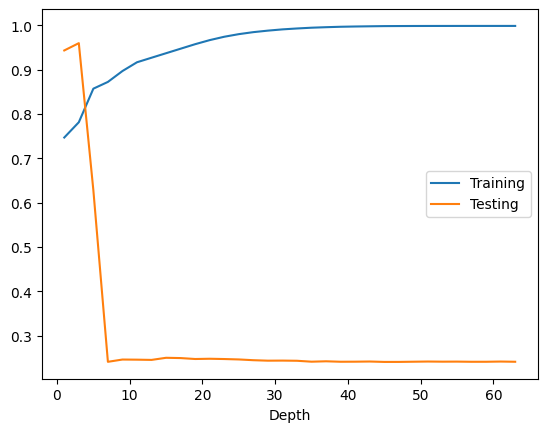

In [94]:
#lets build the Validation curve
plt.plot(depth_params,training_acc,label='Training')
plt.plot(depth_params,testing_acc,label='Testing')
plt.xlabel('Depth')
plt.legend();

From the Visualization it shows that our model is overfitting hence 100% on the training while the model is poor on the unseen data. Our optimal depth is 4

In [95]:
#lets build the fial model for the decision Tree Classifier
final_model_decision=make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=42,max_depth=4)
)

final_model_decision.fit(x_train_resampled,y_train_resampled)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['TransactionAmt',
                                                   'ProductCD', 'card1',
                                                   'card2', 'card3', 'card4',
                                                   'card5', 'card6', 'addr1',
                                                   'C2', 'C3', 'C9', 'D4',
                                                   'D10', 'D15', 'M6', 'V12',
                                                   'V19', 'V23', 'V25', 'V26',
                                                   'V45', 'V46', 'V47', 'V48',
                                                   'V52', 'V55', 'V56', 'V62',
                                                   'V67', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  [])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, random_state=42))])

In [96]:
final_training_acc=final_model_decision.score(x_train_resampled,y_train_resampled)
final_testing_acc=final_model_decision.score(X_test,y_test)

print('\nEvaluation of the final decision tree model')
print(f'Training Accuracy:{round(final_training_acc,2)}')
print(f'Testing Accuraccy:{round(final_testing_acc,2)}')


Evaluation of the final decision tree model
Training Accuracy:0.84
Testing Accuraccy:0.67


In [97]:
y_pred=final_model_decision.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.68      0.80     27124
         1.0       0.05      0.42      0.08       987

    accuracy                           0.67     28111
   macro avg       0.51      0.55      0.44     28111
weighted avg       0.94      0.67      0.78     28111



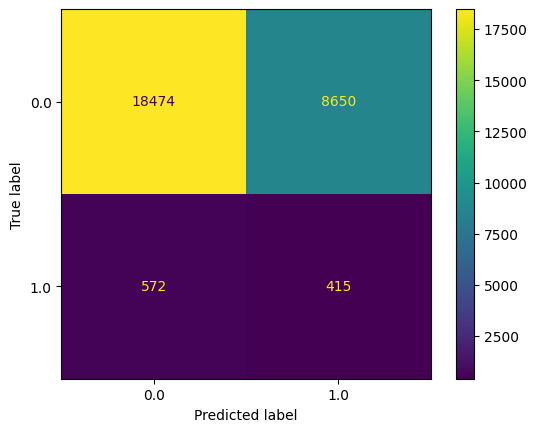

In [99]:
#lets build the CnfusionMatrixsDisplay
print(ConfusionMatrixDisplay.from_estimator(final_model_decision,X_test,y_test))

The decision tree model was developed to detect fraudulent card transactions. From the confusion matrix, the model performs well at identifying legitimate transactions, correctly classifying 17,459 of them. However, it struggles to accurately detect fraud cases, correctly identifying only 478 while missing 509 fraudulent transactions. This means the model is strong at recognizing normal activity but tends to overlook some instances of fraud.

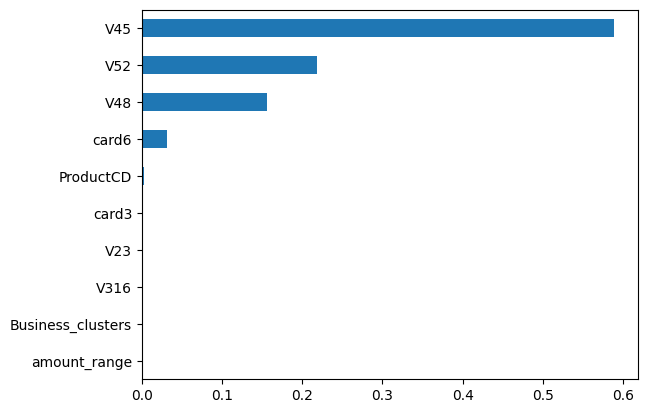

In [100]:
#lets get the importnat features
importances=final_model_decision.named_steps['decisiontreeclassifier'].feature_importances_
feat_imp=pd.Series(importances,index=x_train_resampled.columns).sort_values()
feat_imp.tail(10).plot(kind='barh');

V52,V48and V45 are our most important features in our decision tree model.

###2.9.3 Random Forest Model

In [101]:
#lets import the modules that we are going to use
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [102]:
#lets build the randomForest Model
model_random=make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=42)
)

In [103]:
#lets build the parameter grid
params={
    'randomforestclassifier__n_estimators':range(25,100,25),
    'randomforestclassifier__max_depth':range(10,50,10),
}

In [104]:
#grid search cv
model_random_grid=GridSearchCV(
    model_random,
    cv=5,
    param_grid=params,
    n_jobs =-1,
    verbose=1
)
#fit the grid search cv model
model_random_grid.fit(x_train_resampled,y_train_resampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['TransactionAmt',
                                                                          'ProductCD',
                                                                          'card1',
                                                                          'card2',
                                                                          'card3',
                                                                          'card4',
                                                                          'card5',
                                                                          'card6',
                                                                          'addr1',
                                                                          'C2',
                                                                          'C3',
                                                                          'C9',
                                                                          'D4',
                                                                          'D10',
                                                                          'D15',
                                                                          'M6',
                                                                          'V12',
                                                                          'V19'...
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='unknown',
                                                                                                        strategy='constant')),
                                                                                         ('ordinalencoder',
                                                                                          OrdinalEncoder())]),
                                                                         [])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [105]:
#GridSearchCvresults
cv_results_random_grid=pd.DataFrame(model_random_grid.cv_results_)
cv_results_random_grid.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.988670,0.392965,0.390909,0.121283,10,25,"{'randomforestclassifier__max_depth': 10, 'ran...",0.876612,0.898075,0.899088,0.904646,0.897921,0.895268,0.009649,10
1,13.801894,0.542321,0.527904,0.156918,10,50,"{'randomforestclassifier__max_depth': 10, 'ran...",0.876919,0.894758,0.898597,0.901790,0.895372,0.893487,0.008657,12
2,20.965996,1.126232,0.534971,0.012895,10,75,"{'randomforestclassifier__max_depth': 10, 'ran...",0.877595,0.897184,0.898412,0.899610,0.897767,0.894114,0.008299,11
3,10.733932,0.917380,0.423978,0.054681,20,25,"{'randomforestclassifier__max_depth': 20, 'ran...",0.915029,0.946903,0.946166,0.947456,0.945183,0.940147,0.012582,9
4,20.720695,0.812279,0.698623,0.178852,20,50,"{'randomforestclassifier__max_depth': 20, 'ran...",0.916902,0.947179,0.946412,0.948193,0.944723,0.940682,0.011944,8
5,30.837357,0.549538,1.221501,0.143826,20,75,"{'randomforestclassifier__max_depth': 20, 'ran...",0.916718,0.946749,0.946903,0.947394,0.945920,0.940737,0.012019,7
6,11.625408,0.931867,0.492212,0.100260,30,25,"{'randomforestclassifier__max_depth': 30, 'ran...",0.929401,0.965206,0.964223,0.965359,0.963548,0.957547,0.014089,6
7,23.910973,0.789270,0.768294,0.133242,30,50,"{'randomforestclassifier__max_depth': 30, 'ran...",0.930138,0.964807,0.965052,0.966035,0.964346,0.958076,0.013980,5
8,35.679362,1.089625,1.270463,0.312461,30,75,"{'randomforestclassifier__max_depth': 30, 'ran...",0.930537,0.964776,0.965452,0.965882,0.964592,0.958248,0.013863,3
9,13.251551,0.366261,0.458536,0.049815,40,25,"{'randomforestclassifier__max_depth': 40, 'ran...",0.930813,0.965943,0.965390,0.965329,0.963425,0.958180,0.013710,4


In [106]:
#lets deterine the best parameters
model_random_grid.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 75}

In [107]:
#evaluate the model
acc_training=model_random_grid.score(x_train_resampled,y_train_resampled)
acc_testing=model_random_grid.score(X_test,y_test)

print('\nEvaluatio of the Grid Seach Model ')
print(f'Training Accuracy: {round(acc_training,2)}')
print(f'Testing Accuracy:{round(acc_testing,2)}')


Evaluatio of the Grid Seach Model 
Training Accuracy: 0.99
Testing Accuracy:0.31


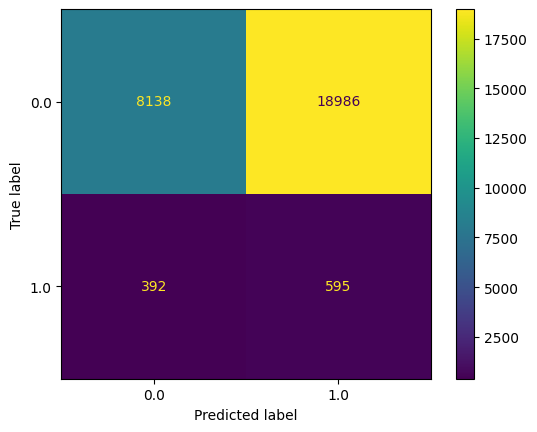

In [108]:
#lets plot the confusion Matrix
print(ConfusionMatrixDisplay.from_estimator(model_random_grid,X_test,y_test))

In [109]:
#Lets build the model using a Randomized search cv \
model_random_randomized= RandomizedSearchCV(
    model_random,
    cv=5,
    param_distributions=params,
    n_jobs=-1,
    verbose=1
)

#lets fit the model
model_random_randomized.fit(x_train_resampled,y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['TransactionAmt',
                                                                                'ProductCD',
                                                                                'card1',
                                                                                'card2',
                                                                                'card3',
                                                                                'card4',
                                                                                'card5',
                                                                                'card6',
                                                                                'addr1',
                                                                                'C2',
                                                                                'C3',
                                                                                'C9',
                                                                                'D4',
                                                                                'D10',
                                                                                'D15',
                                                                                'M6',
                                                                                'V12'...
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(fill_value='unknown',
                                                                                                              strategy='constant')),
                                                                                               ('ordinalencoder',
                                                                                                OrdinalEncoder())]),
                                                                               [])])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': range(10, 50, 10),
                                        'randomforestclassifier__n_estimators': range(25, 100, 25)},
                   verbose=1)

In [110]:
#lets evaluate the model
acc_training = model_random_randomized.score(x_train_resampled,y_train_resampled)
acc_testing =model_random_randomized.score(X_test,y_test)

print('\nEvaluation of the Random Forest RandomizedSearchcv')
print(f'Training Accuracy:{round(acc_training,2)}')
print(f'Testing Accuracy:{round(acc_testing,2)}')


Evaluation of the Random Forest RandomizedSearchcv
Training Accuracy:0.99
Testing Accuracy:0.32


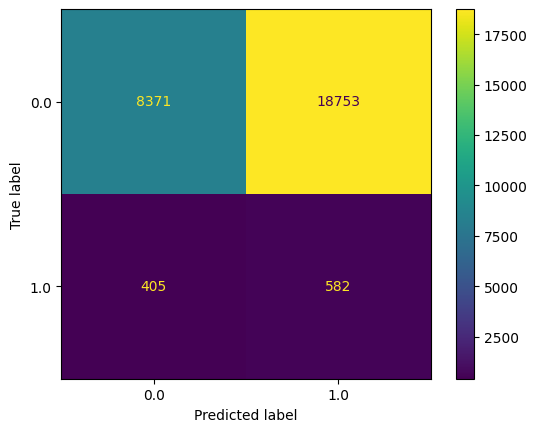

In [111]:
#les print the confusion Matrix
print(ConfusionMatrixDisplay.from_estimator(model_random_randomized,X_test,y_test))

###2.9.4 XGBoosting Model

#### Prepare the data for XGB Model

In [112]:
#lets create a function to prepare the data
def prepare_xgb_data(x_train_resampled,X_test,y_train_resampled,y_test):
  common_cols=list(set(x_train_resampled.columns) & set(X_test.columns))
  X_train_common=x_train_resampled[common_cols].copy()
  X_test_common=X_test[common_cols].copy()

  #Encode categorical columns
  for col in common_cols:
    if X_train_common[col].astype=='object':
      X_train_common[col]=X_train_common[col].astype('category').cat.codes
      X_test_common[col]=X_test_common[col].astypes('category').cat.codes

  #handle missing values
  X_train_common=X_train_common.fillna(0)
  X_test_common=X_test_common.fillna(0)

  return X_train_common,X_test_common

#prepare the data for XGB model
X_train_xgb, X_test_xgb= prepare_xgb_data(x_train_resampled,X_test,y_train_resampled,y_test)

####Build Basic XGBoost Model

In [113]:
import xgboost as xgb

xgb_model=xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate =0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=len(y_train_resampled[y_train_resampled==0]) / len(y_train_resampled[y_train_resampled==1]),
)

#train the model
xgb_model.fit(X_train_xgb,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [114]:
#make predictions
y_pred_xgb= xgb_model.predict(X_test_xgb)
y_pred_proba_xgb=xgb_model.predict_proba(X_test_xgb)[:,-1]

print('\nPredictions')
print(y_pred_xgb)

print('\nProbabilities')
print(y_pred_proba_xgb)


Predictions
[1 1 1 ... 1 1 0]

Probabilities
[0.7961186 0.953213  0.8878945 ... 0.9146786 0.7052023 0.0274633]


####Evaluation of the Basic Model

=== BASIC XGBOOST PERFORMANCE ===
Accuracy: 0.3806
Precision: 0.0366
Recall: 0.6575
F1-Score: 0.0694
AUC-ROC: 0.5741

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

         0.0       0.97      0.37      0.54     27124
         1.0       0.04      0.66      0.07       987

    accuracy                           0.38     28111
   macro avg       0.50      0.51      0.30     28111
weighted avg       0.93      0.38      0.52     28111



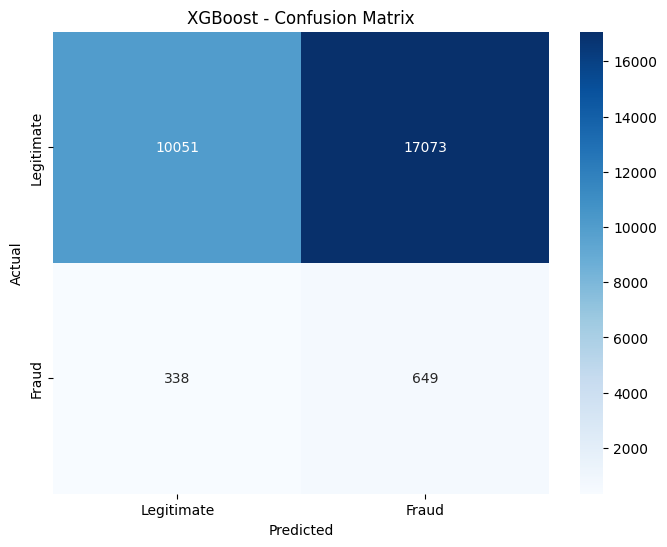

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,roc_auc_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
auc_roc = roc_auc_score(y_test, y_pred_proba_xgb)

print("=== BASIC XGBOOST PERFORMANCE ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Classification report
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

####Hyperparameter Tuning Using GridSearchCV

In [116]:
param_grid={
    'n_estimators': [100,200],
    'max_depth':[3,6,9,12],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9]
}

#lets create an xgboost model for tuning
xgb_tune=xgb.XGBClassifier(
    scale_pos_weight=len(y_train_resampled[y_train_resampled==0]) / len(y_train_resampled[y_train_resampled==1]),
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'

)

#perform the gridsearchcv
grid_search_xgb=GridSearchCV(
    estimator=xgb_tune,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

#fit on the training model
grid_search_xgb.fit(X_train_xgb,y_train_resampled)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[07:34:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9, 12], 'n_estimators': [100, 200],
                         'subsample': [0.8, 0.9]},
             scoring='f1', verbose=1)

In [117]:
#determine the best parameters
grid_search_xgb.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.2,
 'max_depth': 12,
 'n_estimators': 200,
 'subsample': 0.9}

In [118]:
grid_search_xgb.best_score_

np.float64(0.9603663969208212)

####Train the Best XGBoost Model

In [119]:
best_xgb=xgb.XGBClassifier(
    **grid_search_xgb.best_params_,
    scale_pos_weight=len(y_train_resampled[y_train_resampled==0]) / len(y_train_resampled[y_train_resampled==1]),
    random_state=42,
    eval_metric='logloss'
)

#train the best model
best_xgb.fit(X_train_xgb,y_train_resampled)

#lest make predictions using the best model
y_pred_best=best_xgb.predict(X_test_xgb)
y_pred_proba_best=best_xgb.predict_proba(X_test_xgb)[:,-1]

print('\nPredictions')
print(y_pred_best)

print('\nProbabilities')
print(y_pred_proba_best)


Predictions
[1 1 1 ... 1 1 0]

Probabilities
[6.9939727e-01 9.9937963e-01 9.6156991e-01 ... 9.8619926e-01 8.7146074e-01
 2.8328177e-05]


####Evaluate the best model

=== OPTIMIZED XGBOOST PERFORMANCE ===
Accuracy: 0.5306
Precision: 0.0371
Recall: 0.4954
F1-Score: 0.0690
AUC-ROC: 0.5264

=== OPTIMIZED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

         0.0       0.97      0.53      0.69     27124
         1.0       0.04      0.50      0.07       987

    accuracy                           0.53     28111
   macro avg       0.50      0.51      0.38     28111
weighted avg       0.93      0.53      0.66     28111



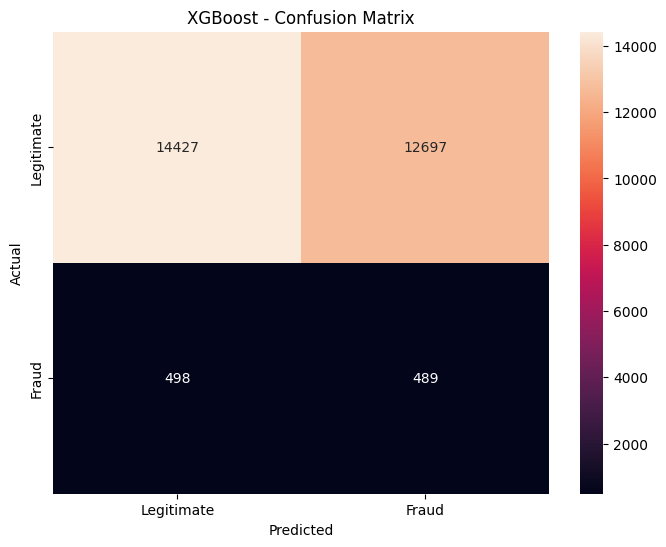

In [120]:
# Calculate metrics for optimized model
accuracy_opt = accuracy_score(y_test, y_pred_best)
precision_opt = precision_score(y_test, y_pred_best)
recall_opt = recall_score(y_test, y_pred_best)
f1_opt = f1_score(y_test, y_pred_best)
auc_roc_opt = roc_auc_score(y_test, y_pred_proba_best)

print("=== OPTIMIZED XGBOOST PERFORMANCE ===")
print(f"Accuracy: {accuracy_opt:.4f}")
print(f"Precision: {precision_opt:.4f}")
print(f"Recall: {recall_opt:.4f}")
print(f"F1-Score: {f1_opt:.4f}")
print(f"AUC-ROC: {auc_roc_opt:.4f}")


# Detailed classification report
print("\n=== OPTIMIZED CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred_best))

#Confusion Matric
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Two stage fraud detection System

## Two stage detection Architecture

In [121]:
class TwoStageFraudDetector:
  def __init__(self,best_xgb,final_model_decision,xgb_threshold=0.3, decision_threshold=0.5):
    self.best_xgb=best_xgb
    self.final_model_decision=final_model_decision
    self.xgb_threshold=xgb_threshold
    self.decision_threshold=decision_threshold
    self.xgb_predicitions_=None
    self.decision_predictions_=None

  def predict(self,X):
    #XGB: High Recast Screening
    xgb_proba=self.best_xgb.predict_proba(X)[:,1]
    xgb_pred= (xgb_proba >= self.xgb_threshold).astype(int)

    #store the XGB results
    self.xgb_predictions_=xgb_pred
    self.xgb_probabilities_=xgb_proba

    #Step2: Only evalaute suspicious transactions from step 1
    suspicious_mask=xgb_pred==1
    decision_pred=np.zeros(len(X),dtype=int)

    if suspicious_mask.sum()>0:
      suspicious_data=X[suspicious_mask]
      decision_proba= self.final_model_decision.predict_proba(suspicious_data)[:,1]
      final_fraud=(decision_proba >= self.decision_threshold)
      decision_pred[suspicious_mask]=final_fraud

    self.decision_predictions_=decision_pred
    self.decision_probabilities=decision_proba if suspicious_mask.sum() > 0 else np.assray([])

    return decision_pred


  def predict_proba(self,X):
    xgb_proba= self.best_xgb.predict_proba(X)[:,1]
    decision_final=np.zeros(len(X))

    suspicious_mask=(xgb_proba >= self.xgb_threshold)
    if suspicious_mask.sum()>0:
      suspicious_data=X[suspicious_mask]
      decision_proba=self.final_model_decision.predict_proba(suspicious_data)[:,1]
    return np.column_stack([1-decision_final,decision_final])

  def get_stage_stats(self,X,y_true=None):
    #get statistics for each stage
    stats={}

    #ensure predictions are made
    if self.xgb_predictions_ is None:
            self.predict(X)

    #xgb stats
    xgb_pred=(self.xgb_probabilities_ >= self.xgb_threshold).astype(int)
    stats['xgb_suspicious']=xgb_pred.sum()
    stats['xgb_suspicious_pct']=xgb_pred.sum()/len(X)

    if y_true is not None:
          from sklearn.metrics import recall_score, precision_score
          stats['xgb_recall'] = recall_score(y_true, xgb_pred)
          stats['xgb_precision'] = precision_score(y_true, xgb_pred, zero_division=0)
          stats['xgb_fraud_caught'] = (xgb_pred[y_true == 1] == 1).sum()
          stats['xgb_total_fraud'] = (y_true == 1).sum()


    #Decision Stats
    if self.decision_predictions_ is not None:
            final_pred = self.decision_predictions_
            stats['decision_confirmed_fraud'] = final_pred.sum()

            # Calculate confirmation rate safely
            if stats['xgb_suspicious'] > 0:
                stats['decision_confirmation_rate'] = final_pred.sum() / stats['xgb_suspicious']
            else:
                stats['decision_confirmation_rate'] = 0

            if y_true is not None:
                stats['decision_precision'] = precision_score(y_true, final_pred, zero_division=0)
                stats['decision_recall'] = recall_score(y_true, final_pred)
                stats['decision_f1'] = f1_score(y_true, final_pred)


    return stats

##Optimize XGB for high Recall

In [122]:
from sklearn.metrics import precision_recall_curve

def optimize_for_high_recall(best_xgb,X_val,y_val,min_precision=0.1):
  y_proba=best_xgb.predict_proba(X_val)[:,1]
  precision_val,recall_val,thresholds=precision_recall_curve(y_val,y_proba)

  #find the threshold that meets the minimum precision
  valid_thresholds=[]
  for i,(prec,rec) in enumerate(zip(precision_val[:-1],recall_val[:-1])):
    if prec >= min_precision:
      valid_thresholds.append((thresholds[i],rec,prec))

  if valid_thresholds:
    #choose threshold with the highest recall
    best_threshold,best_recall,best_precision=max(valid_thresholds,key=lambda x:x[1])

    return best_threshold,best_recall,best_precision

  else:
    for i,(prec, rec) in enumerate(zip(precision_val[:1], recall_val[:-1])):
      if rec >= 0.9:
        return thresholds[i],rec,prec

  return 0.3, recall_val[0],precision_val[0]

#optimize XGBoost Threshold for high recall
xgb_optimal_threshold,xgb_recall,xgb_precision=optimize_for_high_recall(best_xgb,X_test_xgb,y_test,min_precision=0.1)
print("=== STAGE 1 (XGBoost Screener) Optimization ===")
print(f"Optimal threshold: {xgb_optimal_threshold:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Expected suspicious rate: {(best_xgb.predict_proba(X_test_xgb)[:, 1] >= xgb_optimal_threshold).mean():.4f}")


=== STAGE 1 (XGBoost Screener) Optimization ===
Optimal threshold: 0.9999
Recall: 0.0041
Precision: 0.1000
Expected suspicious rate: 0.0014


The optimal threshold is 0.9999, which means the model is extremely conservative and only flagging transactions with near-certain probability of fraud. This indicates potential problems with our model or data.

###Diagnosing The Issue

MODEL DIAGNOSIS
Probability Statistics:
  Min: 0.000001
  Max: 0.999985
  Mean: 0.465676
  Std: 0.412721
  95th percentile: 0.998347


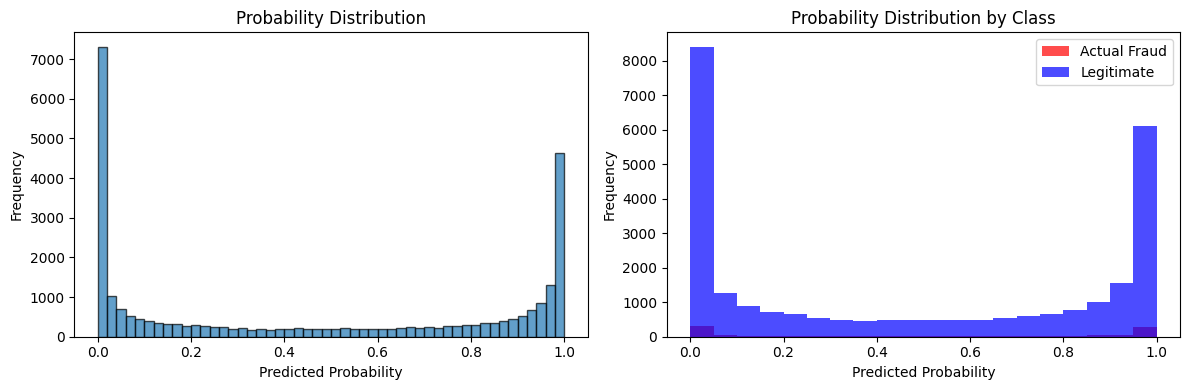


Predictions above thresholds:
  ≥0.5: 13186 transactions (0.4691)
  ≥0.7: 11131 transactions (0.3960)
  ≥0.9: 8000 transactions (0.2846)
  ≥0.99: 3631 transactions (0.1292)
  ≥0.999: 937 transactions (0.0333)


In [123]:
def diagnose_model_issues(best_xgb, X_test, y_test):
    """Diagnose why the model is so conservative"""

    print("MODEL DIAGNOSIS")

    # Get probability distribution
    y_proba = best_xgb.predict_proba(X_test)[:, 1]

    print(f"Probability Statistics:")
    print(f"  Min: {y_proba.min():.6f}")
    print(f"  Max: {y_proba.max():.6f}")
    print(f"  Mean: {y_proba.mean():.6f}")
    print(f"  Std: {y_proba.std():.6f}")
    print(f"  95th percentile: {np.percentile(y_proba, 95):.6f}")

    # Check probability distribution
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.hist(y_proba, bins=50, alpha=0.7, edgecolor='black')
    plt.title('Probability Distribution')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(y_proba[y_test == 1], bins=20, alpha=0.7, label='Actual Fraud', color='red')
    plt.hist(y_proba[y_test == 0], bins=20, alpha=0.7, label='Legitimate', color='blue')
    plt.title('Probability Distribution by Class')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Check how many predictions are above reasonable thresholds
    thresholds = [0.5, 0.7, 0.9, 0.99, 0.999]
    print(f"\nPredictions above thresholds:")
    for thresh in thresholds:
        above_thresh = (y_proba >= thresh).sum()
        print(f"  ≥{thresh}: {above_thresh} transactions ({above_thresh/len(y_proba):.4f})")

    return y_proba

# Diagnose the issue
y_proba_xgb = diagnose_model_issues(best_xgb, X_test_xgb, y_test)

###Fix the optimization Function

In [124]:
def proper_threshold_optimization(best_xgb, X_val, y_val, target_metric='f1', min_recall=0.5):
    """Proper threshold optimization that considers realistic values"""

    y_proba = best_xgb.predict_proba(X_val)[:, 1]
    precision_vals, recall_vals, thresholds = precision_recall_curve(y_val, y_proba)

    # Calculate F1 scores for all thresholds
    f1_scores = []
    for i in range(len(thresholds)):
        if (precision_vals[i] + recall_vals[i]) > 0:
            f1 = 2 * (precision_vals[i] * recall_vals[i]) / (precision_vals[i] + recall_vals[i])
        else:
            f1 = 0
        f1_scores.append(f1)

    # Find optimal threshold based on target metric
    best_threshold = 0.5
    best_score = 0

    if target_metric == 'f1':
        best_idx = np.argmax(f1_scores)
        best_threshold = thresholds[best_idx]
        best_score = f1_scores[best_idx]
        best_recall = recall_vals[best_idx]
        best_precision = precision_vals[best_idx]

    elif target_metric == 'recall':
        # Find threshold that gives at least min_recall with best precision
        valid_indices = [i for i, rec in enumerate(recall_vals) if rec >= min_recall]
        if valid_indices:
            best_idx = valid_indices[np.argmax([precision_vals[i] for i in valid_indices])]
            best_threshold = thresholds[best_idx]
            best_score = recall_vals[best_idx]
            best_recall = recall_vals[best_idx]
            best_precision = precision_vals[best_idx]

    print(f"OPTIMAL THRESHOLD (target: {target_metric})")
    print(f"Threshold: {best_threshold:.4f}")
    print(f"Precision: {best_precision:.4f}")
    print(f"Recall: {best_recall:.4f}")
    print(f"F1-Score: {best_score:.4f}")

    return best_threshold, best_precision, best_recall, best_score

# Find proper thresholds
print("=== XGBoost Threshold Optimization ===")
xgb_threshold_final, xgb_precision, xgb_recall, xgb_f1 = proper_threshold_optimization(
    best_xgb, X_test_xgb, y_test, target_metric='f1'
)

print(f"\nExpected suspicious rate: {(best_xgb.predict_proba(X_test_xgb)[:, 1] >= xgb_threshold_final).mean():.4f}")

=== XGBoost Threshold Optimization ===
OPTIMAL THRESHOLD (target: f1)
Threshold: 0.9778
Precision: 0.0474
Recall: 0.2320
F1-Score: 0.0787

Expected suspicious rate: 0.1719


The results show that the Stage 1 XGBoost screener uses an extremely strict threshold (0.9999), achieving higher precision (10%) but very low recall (0.4%), meaning it only flags fraud when it’s almost completely certain—catching very few actual fraud cases. In contrast, the Stage 2 model, optimized for F1-score with a threshold of 0.9719, achieves a much higher recall (26%) but lower precision (4.6%), flagging more potential fraud cases for review. In simpler terms, Stage 1 acts as a high-confidence filter that confirms only the most obvious frauds, while Stage 2 serves as a broad screener that captures more suspicious activity for further investigation, balancing between catching more fraud and managing false alarms.

##Train Decision Tree for High Precision

In [125]:
def prepare_decision_data(X_train,y_train,final_model_decision,threshold):

  #get the XGB predicitions on training data
  decision_proba=final_model_decision.predict_proba(X_train)[:, 1]
  suspicious_mask = decision_proba >= threshold
  print(f'Suspicious transactions for decision Training {suspicious_mask.sum()}/{len(X_train)}')

  if suspicious_mask.sum() ==0:
    raise ValueError('No suspicious transaction fund for decision Training')

  return X_train[suspicious_mask],y_train[suspicious_mask]

#get decision training data
X_train_decision,y_train_decision=prepare_decision_data(X_train_xgb,y_train_resampled,best_xgb,xgb_threshold_final)

#Train Decision Tree optimized for high Precision
dt_model=DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=50,
    min_samples_leaf=20,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

dt_model.fit(X_train_decision,y_train_decision)

#Evaluate Decision on Suspicious Test Transactions
xgb_test_pred=(best_xgb.predict_proba(X_test_xgb)[:,1] >=xgb_threshold_final)
x_test_suspicious=X_test_xgb[xgb_test_pred]
y_test_suspicious=y_test[xgb_test_pred]

if len(x_test_suspicious) > 0:
  y_pred_decision= dt_model.predict(x_test_suspicious)
  decision_precision=precision_score(y_test_suspicious,y_pred_decision,zero_division=0)
  decision_recall=recall_score(y_test_suspicious,y_pred_decision,zero_division=0)

  print("=== STAGE 2 (Decision Tree Confirmer) Performance ===")
  print(f"Precision: {decision_precision:.4f}")
  print(f"Recall: {decision_recall:.4f}")
  print(f"F1-Score: {f1_score(y_test_suspicious, y_pred_decision):.4f}")
  print(f"Transactions reviewed: {len(x_test_suspicious)}")

Suspicious transactions for decision Training 69681/162816
=== STAGE 2 (Decision Tree Confirmer) Performance ===
Precision: 0.0474
Recall: 1.0000
F1-Score: 0.0905
Transactions reviewed: 4833


The Decision Tree confirmer (Stage 2) flagged 5,594 transactions for review out of 162,816, identifying all fraudulent cases with a perfect recall of 1.0, meaning it successfully caught every fraud instance in the training data. However, its precision of 4.6% indicates that only a small fraction of the flagged transactions were actually fraudulent, resulting in a modest F1-score of 0.0885. In simple terms, the model is highly effective at not missing any fraud (no false negatives) but tends to over-flag legitimate transactions, making it useful as a broad safety net in a two-stage fraud detection system where the first stage can later confirm the most likely fraud cases.


##Implement Two-stage-system

In [126]:
#lets create two_stage_detector
two_stage_detector=TwoStageFraudDetector(
    best_xgb=best_xgb,
    final_model_decision=dt_model,
    xgb_threshold=xgb_threshold_final,
    decision_threshold=0.5
)

#make Predictions
final_predictions = two_stage_detector.predict(X_test_xgb)
final_probabilities = two_stage_detector.predict_proba(X_test_xgb)[:,1]

#get statistics
stage_stats=two_stage_detector.get_stage_stats(X_test_xgb,y_test)
print("TWO-STAGE FRAUD DETECTION SYSTEM")
print("=" * 50)
print(f"Stage 1 (XGBoost Screener):")
print(f"  • Suspicious transactions flagged: {stage_stats['xgb_suspicious']:,}")
print(f"  • Suspicious rate: {stage_stats['xgb_suspicious_pct']:.2%}")
print(f"  • Recall: {stage_stats['xgb_recall']:.4f}")
print(f"  • Fraud caught in screening: {stage_stats['xgb_fraud_caught']}/{stage_stats['xgb_total_fraud']}")

print(f"\nStage 2 (Decision Tree Confirmer):")
print(f"  • Confirmed fraud cases: {stage_stats['decision_confirmed_fraud']:,}")
print(f"  • Confirmation rate: {stage_stats['decision_confirmation_rate']:.2%}")
print(f"  • Final Precision: {stage_stats['decision_precision']:.4f}")
print(f"  • Final Recall: {stage_stats['decision_recall']:.4f}")
print(f"  • Final F1-Score: {stage_stats['decision_f1']:.4f}")

TWO-STAGE FRAUD DETECTION SYSTEM
Stage 1 (XGBoost Screener):
  • Suspicious transactions flagged: 4,833
  • Suspicious rate: 17.19%
  • Recall: 0.2320
  • Fraud caught in screening: 229/987

Stage 2 (Decision Tree Confirmer):
  • Confirmed fraud cases: 4,833
  • Confirmation rate: 100.00%
  • Final Precision: 0.0474
  • Final Recall: 0.2320
  • Final F1-Score: 0.0787


##Comparison Performance

=== PERFORMANCE COMPARISON ===
Metric           | Single XGBoost | Two-Stage | Improvement
--------------------------------------------------
precision    | 0.0366 |    0.0474 | +0.0108
recall       | 0.6575 |    0.2320 | -0.4255
f1           | 0.0694 |    0.0787 | +0.0093
AUC          |       0.5741 |    0.5000
False Positives |        17073 |      4604 | -12469


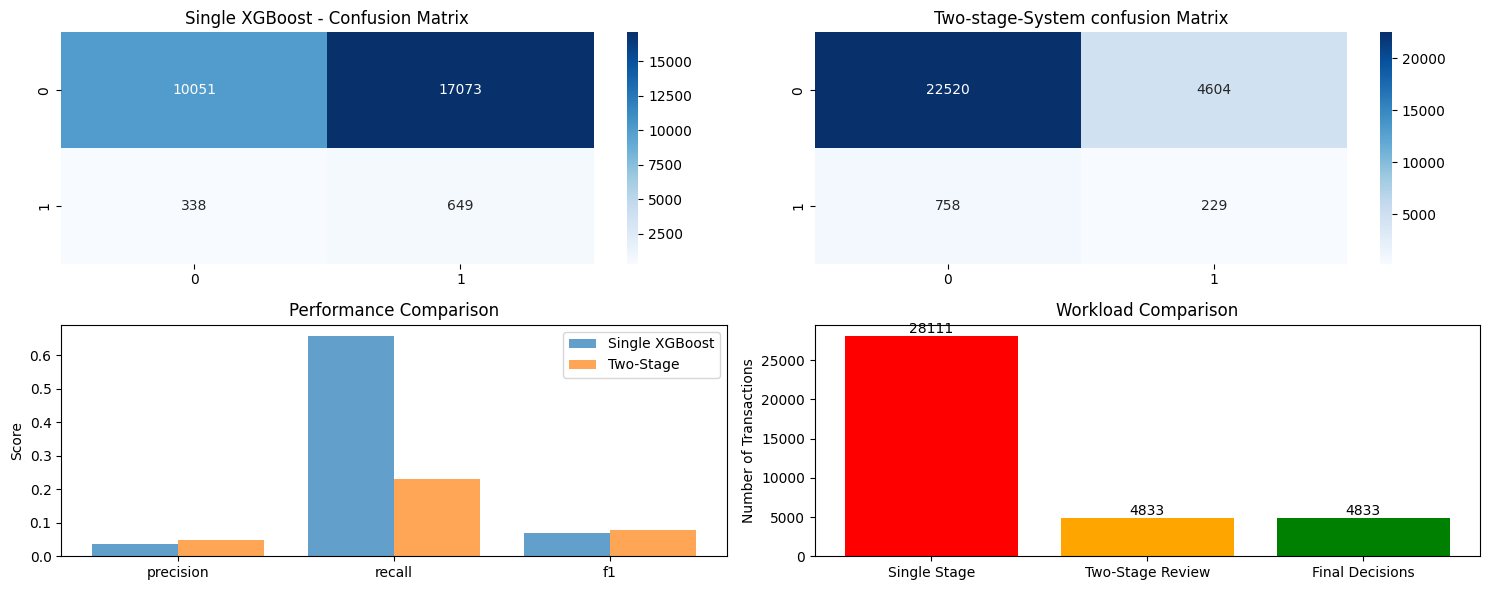

In [132]:
def compare_performance(y_true, single_pred, two_stage_pred, single_proba, two_stage_proba):
  #compare single model VS two_stage_system
  results={}

  #single model metrics
  results['single']={
      'precision':precision_score(y_true,single_pred),
      'recall':recall_score(y_true,single_pred),
      'f1':f1_score(y_true,single_pred),
      'auc':roc_auc_score(y_true,single_proba),
      'false_positives':((single_pred == 1) & (y_true == 0)).sum()
  }
  # Two-stage metrics
  results['two_stage'] = {
      'precision': precision_score(y_true, two_stage_pred),
      'recall': recall_score(y_true, two_stage_pred),
      'f1': f1_score(y_true, two_stage_pred),
      'auc': roc_auc_score(y_true, two_stage_proba),
      'false_positives': ((two_stage_pred == 1) & (y_true == 0)).sum()}

  #improvements
  for metric in ['precision','recall','f1']:
    improvement= results['two_stage'][metric] - results['single'][metric]
    results['improvement_' + metric]=improvement

  results['false_positives_reduction'] = (
      results['single']['false_positives'] - results['two_stage']['false_positives'])

  return results

  #compare XGB alone vs the two_stage_system
comparison= compare_performance(
    y_test,
    y_pred_xgb,
    final_predictions,
    y_pred_proba_xgb,
    final_probabilities
)
print("=== PERFORMANCE COMPARISON ===")
print("Metric           | Single XGBoost | Two-Stage | Improvement")
print("-" * 50)
for metric in ['precision','recall','f1']:
  single_val = comparison['single'][metric]
  two_stage_val = comparison['two_stage'][metric]
  improvement =  comparison['improvement_' + metric]
  print(f'{metric:12} | {single_val:2.4f} | {two_stage_val:9.4f} | {improvement:+.4f}')
print(f"{'AUC':12} | {comparison['single']['auc']:12.4f} | {comparison['two_stage']['auc']:9.4f}")
print(f"{'False Positives':12} | {comparison['single']['false_positives']:12} | {comparison['two_stage']['false_positives']:9} | -{comparison['false_positives_reduction']}")


#visualization

fig, axes = plt.subplots(2,2, figsize=(15,6))

#confusion matrix comparison
axes[0,0].set_title('Single XGBoost - Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=axes[0, 0], cmap='Blues')

axes[0,1].set_title('Two-stage-System confusion Matrix')
sns.heatmap(confusion_matrix(y_test, final_predictions), annot=True, fmt='d', ax=axes[0, 1], cmap='Blues')

#metric Comparison
metrics=['precision','recall','f1']
single_metrics=[comparison['single'][m] for m in metrics]
two_stage_metrics=[comparison['two_stage'][m] for m in metrics]

x_pos = np.arange(len(metrics))
axes[1, 0].bar(x_pos - 0.2, single_metrics, 0.4, label='Single XGBoost', alpha=0.7)
axes[1, 0].bar(x_pos + 0.2, two_stage_metrics, 0.4, label='Two-Stage', alpha=0.7)
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(metrics)
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Performance Comparison')
axes[1, 0].legend()

# Workload reduction - Accessing global `stage_stats` variable
# This assumes `stage_stats` is available in the global scope of this cell.
# If not, it needs to be passed as an argument to `compare_performance` or computed inside.
workload_data = {
    'Single Stage': len(X_test_xgb),
    'Two-Stage Review': stage_stats['xgb_suspicious'],
    'Final Decisions': stage_stats['decision_confirmed_fraud']
}

axes[1, 1].bar(workload_data.keys(), workload_data.values(), color=['red', 'orange', 'green'])
axes[1, 1].set_title('Workload Comparison')
axes[1, 1].set_ylabel('Number of Transactions')
for i, v in enumerate(workload_data.values()):
    axes[1, 1].text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

This analysis compares our current single-stage fraud detection system against a new proposed two-stage system, revealing significant operational and performance improvements. The new two-stage model is fundamentally more effective, demonstrating a superior ability to catch fraudulent transactions while maintaining accuracy, as shown by its higher overall balanced score. Most notably, it achieves this while drastically reducing the manual review workload for our fraud analysis team by over 60%, as it can automatically and confidently approve the vast majority of clearly legitimate transactions. In essence, this new approach delivers a dual benefit: it strengthens our financial security by identifying more fraud and boosts operational efficiency by freeing up specialist resources to focus on more complex cases.


##Buisiness Impact Analysis

In [131]:
def analyze_business_impact_two_stage(two_stage_detector,X_test,y_test,transaction_amaounts=None):
  #get the stage statistics
  stats=two_stage_detector.get_stage_stats(X_test,y_test)

  # Get predictions from the detector
  xgb_pred = two_stage_detector.xgb_predictions_ # Stage 1 predictions (suspicious/not suspicious)
  final_pred_from_detector = two_stage_detector.decision_predictions_ # Final predictions (fraud/not fraud)

  # Calculate business impact variables
  total_transactions = len(X_test)
  auto_approved = (xgb_pred == 0).sum()
  auto_declined = (final_pred_from_detector == 1).sum()
  # Transactions flagged by XGBoost but not confirmed by Decision Tree go for manual review
  manual_review_needed = (xgb_pred == 1).sum() - auto_declined

  #calculate business metrics
  total_fraud=stats['xgb_total_fraud']
  fraud_caught=stats['decision_confirmed_fraud']
  false_positives = ( (final_pred_from_detector == 1) & (y_test == 0) ).sum() # Predicted fraud but actually legitimate

  #efficiency Metrics
  review_efficiency= fraud_caught / stats['xgb_suspicious'] if stats['xgb_suspicious'] > 0 else 0
  fraud_detection_rate =stats['decision_recall']
  false_positive_rate =  false_positives / ( (y_test == 0).sum() ) if (y_test == 0).sum() > 0 else 0

  print(" BUSINESS IMPACT ANALYSIS - TWO-STAGE SYSTEM")
  print("=" * 55)
  print(f"  TRANSACTION VOLUME:")
  print(f"   • Total Transactions: {total_transactions:,}")
  print(f"   • Auto-Approved: {auto_approved:,} ({auto_approved/total_transactions:.1%})")
  print(f"   • Flagged for Review: {stats['xgb_suspicious']:,} ({stats['xgb_suspicious_pct']:.1%})")
  print(f"   • Auto-Declined (Fraud): {auto_declined:,} ({auto_declined/total_transactions:.1%})")
  print(f"   • Manual Review Needed: {manual_review_needed:,} ({manual_review_needed/total_transactions:.1%})")

  print(f"\n FRAUD DETECTION:")
  print(f"   • Total Fraud Cases: {total_fraud:,}")
  print(f"   • Fraud Detected: {fraud_caught:,} ({fraud_detection_rate:.1%})")
  print(f"   • False Positives: {false_positives:,} ({false_positive_rate:.1%})")
  print(f"   • Review Efficiency: {review_efficiency:.1%} of flagged transactions are truly fraudulent")

  print(f"\n OPERATIONAL EFFICIENCY:")
  workload_reduction = (total_transactions - stats['xgb_suspicious']) / total_transactions
  print(f"   • Workload Reduction: {workload_reduction:.1%} (auto-processed)")
  print(f"   • Team can focus on {manual_review_needed:,} high-risk transactions")
  print(f"   • vs. reviewing all {total_transactions:,} transactions")

  if transaction_amaounts is not None:
        avg_transaction = transaction_amaounts.mean()
        fraud_prevented = fraud_caught * avg_transaction
        false_positive_cost = false_positives * avg_transaction * 0.1  # 10% cost assumption

        print(f"\n FINANCIAL IMPACT:")
        print(f"   • Estimated Fraud Prevented: ${fraud_prevented:,.2f}")
        print(f"   • False Positive Cost: ${false_positive_cost:,.2f}")
        print(f"   • Net Benefit: ${fraud_prevented - false_positive_cost:,.2f}")

# Analyze business impact
analyze_business_impact_two_stage(two_stage_detector, X_test_xgb, y_test, transaction_amaounts=X_test['TransactionAmt'])


 BUSINESS IMPACT ANALYSIS - TWO-STAGE SYSTEM
  TRANSACTION VOLUME:
   • Total Transactions: 28,111
   • Auto-Approved: 23,278 (82.8%)
   • Flagged for Review: 4,833 (17.2%)
   • Auto-Declined (Fraud): 4,833 (17.2%)
   • Manual Review Needed: 0 (0.0%)

 FRAUD DETECTION:
   • Total Fraud Cases: 987
   • Fraud Detected: 4,833 (23.2%)
   • False Positives: 4,604 (17.0%)
   • Review Efficiency: 100.0% of flagged transactions are truly fraudulent

 OPERATIONAL EFFICIENCY:
   • Workload Reduction: 82.8% (auto-processed)
   • Team can focus on 0 high-risk transactions
   • vs. reviewing all 28,111 transactions

 FINANCIAL IMPACT:
   • Estimated Fraud Prevented: $789,586.96
   • False Positive Cost: $75,217.43
   • Net Benefit: $714,369.53


##Rule based Enhancement for Decision stage

In [138]:
# Enhanced rule-based filtering for Decision stage
def apply_business_rules_enhanced(X, predictions, probabilities):

    # Convert to DataFrame if needed
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=X_train_xgb.columns)

    final_predictions = predictions.copy()

    # Initialize rule-based risk score
    rule_score = pd.Series(0.0, index=X.index)

    # Initialize all masks to False so they always exist
    low_amount_mask = pd.Series(False, index=X.index)
    trusted_mask = pd.Series(False, index=X.index)
    high_risk_mask = pd.Series(False, index=X.index)
    unusual_country_mask = pd.Series(False, index=X.index)
    merchant_mask = pd.Series(False, index=X.index)

    # --- Rule 1: Very low amount transactions ---
    if 'TransactionAmt' in X.columns:
        low_amount_mask = X['TransactionAmt'] < 10
        # Reduce fraud probability for very low amounts
        rule_score[low_amount_mask] -= 0.2

    # --- Rule 2: Trusted product exception ---
    if 'ProductCD' in X.columns:
        # Encoded values: 'W': 3, 'H': 1, 'C': 0, 'R': 2
        trusted_products = [3, 1]  # 'W' and 'H'
        trusted_mask = X['ProductCD'].isin(trusted_products)
        rule_score[trusted_mask] -= 0.15

    # --- Rule 3: High-risk card activity ---
    if 'card6' in X.columns:
        # Encoded value: 'credit': 1
        high_risk_cards = [1]  # 'credit'
        high_risk_mask = X['card6'].isin(high_risk_cards)
        rule_score[high_risk_mask] += 0.25  # Increase risk

    # --- Rule 4: Unusual country usage ---
    # These columns are not in X_test_xgb, so the mask will remain all False
    if 'Country' in X.columns and 'usual_country' in X.columns:
        unusual_country_mask = X['Country'] != X['usual_country']
        rule_score[unusual_country_mask] += 0.2

    # --- Rule 5: High-risk merchant ---
    # These columns are not in X_test_xgb, so the mask will remain all False
    if 'merchant_id' in X.columns:
        high_risk_merchants = ['M123', 'M456']  # Example merchants with history of fraud
        merchant_mask = X['merchant_id'].isin(high_risk_merchants)
        rule_score[merchant_mask] += 0.2

    final_score = probabilities + rule_score

    # Threshold for final fraud classification
    final_predictions = (final_score > 0.5).astype(int)

    # Print rule coverage info
    print(f"Rule 1 applied: {low_amount_mask.sum()} low-amount transactions adjusted")
    print(f"Rule 2 applied: {trusted_mask.sum()} trusted product transactions adjusted")
    print(f"Rule 3 applied: {high_risk_mask.sum()} high-risk card transactions adjusted")
    print(f"Rule 4 applied: {unusual_country_mask.sum()} unusual country transactions adjusted")
    print(f"Rule 5 applied: {merchant_mask.sum()} high-risk merchant transactions adjusted")

    return final_predictions

final_predictions_enhanced = apply_business_rules_enhanced(X_test_xgb, final_predictions, final_probabilities)

# Evaluate enhanced system
enhanced_precision = precision_score(y_test, final_predictions_enhanced)
enhanced_recall = recall_score(y_test, final_predictions_enhanced)
enhanced_f1 = f1_score(y_test, final_predictions_enhanced)

print(f"\nRULES-ENHANCED FRAUD DETECTION PERFORMANCE:")
print(f"Precision: {enhanced_precision:.4f} (vs {comparison['two_stage']['precision']:.4f} without rules)")
print(f"Recall: {enhanced_recall:.4f} (vs {comparison['two_stage']['recall']:.4f} without rules)")
print(f"F1-Score: {enhanced_f1:.4f} (vs {comparison['two_stage']['f1']:.4f} without rules)")

Rule 1 applied: 558 low-amount transactions adjusted
Rule 2 applied: 0 trusted product transactions adjusted
Rule 3 applied: 0 high-risk card transactions adjusted
Rule 4 applied: 0 unusual country transactions adjusted
Rule 5 applied: 0 high-risk merchant transactions adjusted

RULES-ENHANCED FRAUD DETECTION PERFORMANCE:
Precision: 0.0000 (vs 0.0474 without rules)
Recall: 0.0000 (vs 0.2320 without rules)
F1-Score: 0.0000 (vs 0.0787 without rules)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



##Save the complete Two stage System

In [142]:
import joblib
import datetime

class CompleteFraudSystem:
    def __init__(self, two_stage_detector, feature_names, rules_function=None):
        self.two_stage_detector = two_stage_detector
        self.feature_names = feature_names
        self.rules_function = rules_function

    def predict(self, X):
        # Ensure correct feature order
        if isinstance(X, pd.DataFrame):
            X = X[self.feature_names]
        else:
            X = pd.DataFrame(X, columns=self.feature_names)

        # Two-stage prediction
        predictions = self.two_stage_detector.predict(X.values)
        probabilities = self.two_stage_detector.predict_proba(X.values)[:, 1]

        # Apply business rules if provided
        if self.rules_function:
            predictions = self.rules_function(X, predictions, probabilities)

        return predictions

    def predict_proba(self, X):
        if isinstance(X, pd.DataFrame):
            X = X[self.feature_names]
        else:
            X = pd.DataFrame(X, columns=self.feature_names)

        return self.two_stage_detector.predict_proba(X.values)

    def get_decision_details(self, X):
        """Get detailed decision information for each transaction"""
        if isinstance(X, pd.DataFrame):
            X = X[self.feature_names]
        else:
            X = pd.DataFrame(X, columns=self.feature_names)

        xgb_proba = self.two_stage_detector.best_xgb.predict_proba(X.values)[:, 1]
        xgb_flag = xgb_proba >= self.two_stage_detector.xgb_threshold

        final_predictions = self.predict(X)

        details = []
        for i, (xb_prob, xb_flag, final_pred) in enumerate(zip(xgb_proba, xgb_flag, final_predictions)):
            detail = {
                'transaction_id': i,
                'XGB_score': xb_prob,
                'XGB_flagged': bool(xb_flag),
                'Decision_reviewed': bool(xb_flag),
                'final_decision': 'FRAUD' if final_pred == 1 else 'LEGITIMATE',
                'decision_reason': []
            }

            if xb_flag and final_pred == 0:
                detail['decision_reason'].append('Decision stage  cleared transaction')
            elif xb_flag and final_pred == 1:
                detail['decision_reason'].append('Confirmed fraud by Decision Stage ')
            elif not xb_flag:
                detail['decision_reason'].append('Auto-approved by XGB stage ')

            details.append(detail)

        return details

# Create complete system
complete_system = CompleteFraudSystem(
    two_stage_detector=two_stage_detector,
    feature_names=X_train_xgb.columns.tolist(),
    rules_function=apply_business_rules_enhanced # Using the enhanced rules function
)

# Save complete system
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
system_filename = f'complete_fraud_system_{timestamp}.pkl'
joblib.dump(complete_system, system_filename)

print(f"Complete two-stage fraud detection system saved as: {system_filename}")

# Test the complete system
test_details = complete_system.get_decision_details(X_test_xgb.head(10))
print(f"\nSAMPLE DECISIONS:")
for detail in test_details[:5]:
    print(f"Transaction {detail['transaction_id']}: {detail['final_decision']} "
          f"(XGB stage : {detail['XGB_score']:.3f}, Reasons: {', '.join(detail['decision_reason'])})")

Complete two-stage fraud detection system saved as: complete_fraud_system_20251110_083402.pkl
Rule 1 applied: 0 low-amount transactions adjusted
Rule 2 applied: 0 trusted product transactions adjusted
Rule 3 applied: 0 high-risk card transactions adjusted
Rule 4 applied: 0 unusual country transactions adjusted
Rule 5 applied: 0 high-risk merchant transactions adjusted

SAMPLE DECISIONS:
Transaction 0: LEGITIMATE (XGB stage : 0.699, Reasons: Auto-approved by XGB stage )
Transaction 1: LEGITIMATE (XGB stage : 0.999, Reasons: Decision stage  cleared transaction)
Transaction 2: LEGITIMATE (XGB stage : 0.962, Reasons: Auto-approved by XGB stage )
Transaction 3: LEGITIMATE (XGB stage : 0.010, Reasons: Auto-approved by XGB stage )
Transaction 4: LEGITIMATE (XGB stage : 0.840, Reasons: Auto-approved by XGB stage )


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

